In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pymannkendall as mk
from plotly.offline import plot
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
import datetime
import tqdm as tqdm
import os
import glob
import calendar
import seaborn as sns

warnings.simplefilter(action='ignore', category=Warning)

In [2]:
%config Completer.use_jedi = False                           # This improve the auto-fill function

import geospatialfunctions as geospatialfunctions            # Geospatialfunctions is a module with useful functions

First we can set our working directory and check it:

In [3]:
path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Datasets"
os.chdir(path)
os.getcwd()

'C:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Datasets'

At this part we can read the dataset information provided

#### Concatenate the dataset:
1. Read and adjust the streamflow data:

Each Italian privince has a way of data organization, therefore we have different ways of dealing:

#### (a) Emilia Romagna:

In [130]:
path =r'IT\original\emilia_romagna'
filenames = glob.glob(path + "/*.csv")
len(filenames)

125

In [131]:
timeseriesfinal = pd.DataFrame(index = pd.date_range('09-01-1978','09-30-2022', freq='D'))
network_IT = pd.DataFrame(np.empty((len(filenames),10)))

i = 0

for filename in tqdm.tqdm(filenames):
    
    network_filename = pd.read_csv(filename, encoding='latin-1', skiprows = 4, delimiter = ",",  
                                   skipfooter=6, names = ["Date_start", "dates", "Q_m3s"])
    
    
    network_filename["dates"] = pd.to_datetime(network_filename["dates"].astype(str).str[:10])
    
    
    network_filename.set_index("dates", inplace = True)
    
    

    
    
    
    
    num_lines = len(network_filename)
    info_filename = pd.read_csv(filename, encoding='latin-1', skiprows = num_lines + 4, delimiter = ",",  
                               skipfooter=2)
    
    
    station = info_filename.iloc[0, 0]
    
    network_IT.iloc[i, :] = info_filename.iloc[0,:]
    
   
    timeseriesfinal.loc[:, station] = network_filename.Q_m3s
    
    
    i = i + 1
    

network_IT.columns = info_filename.columns  

100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:11<00:00, 11.21it/s]


In [132]:
timeseriesfinal

Cardinala Idice  Castenaso  Cadelbosco  Polesella  \
1978-09-01              NaN        NaN         NaN        NaN   
1978-09-02              NaN        NaN         NaN        NaN   
1978-09-03              NaN        NaN         NaN        NaN   
1978-09-04              NaN        NaN         NaN        NaN   
1978-09-05              NaN        NaN         NaN        NaN   
...                     ...        ...         ...        ...   
2022-09-26              NaN        NaN         NaN        NaN   
2022-09-27              NaN        NaN         NaN        NaN   
2022-09-28              NaN        NaN         NaN        NaN   
2022-09-29              NaN        NaN         NaN        NaN   
2022-09-30              NaN        NaN         NaN        NaN   

            Berceto Baganza  Fiumalbo  Morciano di Romagna  Castelbolognese  \
1978-09-01              NaN       NaN                  NaN              NaN   
1978-09-02              NaN       NaN                  NaN              NaN   
1978-09-03              NaN       NaN                  NaN              NaN   
1978-09-04              NaN       NaN                  NaN              NaN   
1978-09-05              NaN       NaN                  NaN              NaN   
...                     ...       ...                  ...              ...   
2022-09-26              NaN       NaN                  NaN              NaN   
2022-09-27              NaN       NaN                  NaN              NaN   
2022-09-28              NaN       NaN                  NaN              NaN   
2022-09-29              NaN       NaN                  NaN              NaN   
2022-09-30              NaN       NaN                  NaN              NaN   

            Pracchia  Case Bonini  ...  Boretto  Borgo Tossignano  Mordano  \
1978-09-01      2.76          NaN  ...   933.00               NaN      NaN   
1978-09-02      0.53          NaN  ...   963.00               NaN      NaN   
1978-09-03      0.40          NaN  ...   982.00               NaN      NaN   
1978-09-04      0.32          NaN  ...   936.00               NaN      NaN   
1978-09-05      0.30          NaN  ...   882.00               NaN      NaN   
...              ...          ...  ...      ...               ...      ...   
2022-09-26       NaN          NaN  ...   468.63               NaN      NaN   
2022-09-27       NaN          NaN  ...   479.59               NaN      NaN   
2022-09-28       NaN          NaN  ...   487.06               NaN      NaN   
2022-09-29       NaN          NaN  ...   488.45               NaN      NaN   
2022-09-30       NaN          NaN  ...   479.84               NaN      NaN   

            Borello  Salsomaggiore sul Ghiara  Marradi  Mezzano  Reda  Sarna  \
1978-09-01      NaN                       NaN      NaN      NaN   NaN   0.89   
1978-09-02      NaN                       NaN      NaN      NaN   NaN   0.88   
1978-09-03      NaN                       NaN      NaN      NaN   NaN   0.57   
1978-09-04      NaN                       NaN      NaN      NaN   NaN   0.46   
1978-09-05      NaN                       NaN      NaN      NaN   NaN   0.41   
...             ...                       ...      ...      ...   ...    ...   
2022-09-26      NaN                       NaN      NaN      NaN   NaN    NaN   
2022-09-27      NaN                       NaN      NaN      NaN   NaN    NaN   
2022-09-28      NaN                       NaN      NaN      NaN   NaN    NaN   
2022-09-29      NaN                       NaN      NaN      NaN   NaN    NaN   
2022-09-30      NaN                       NaN      NaN      NaN   NaN    NaN   

            Strada Casale  
1978-09-01            NaN  
1978-09-02            NaN  
1978-09-03            NaN  
1978-09-04            NaN  
1978-09-05            NaN  
...                   ...  
2022-09-26           0.23  
2022-09-27           0.10  
2022-09-28           0.04  
2022-09-29           0.02  
2022-09-30           0.02  

[16101 rows x 121 columns]

<AxesSubplot:>

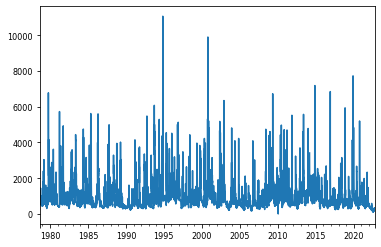

In [133]:
timeseriesfinal.iloc[:, 86].plot()

In [134]:
network_IT

Nome della stazione Rete di misura               Comune      Provincia  \
0       Cardinala Idice         idrtl9              ARGENTA        FERRARA   
1             Castenaso         idrtl9            CASTENASO        BOLOGNA   
2            Cadelbosco         idrtl9  CADELBOSCO DI SOPRA  REGGIO EMILIA   
3             Polesella         idrtl9            POLESELLA         ROVIGO   
4       Berceto Baganza         idrtl9              BERCETO          PARMA   
..                  ...            ...                  ...            ...   
120             Marradi         idrtl9              MARRADI        FIRENZE   
121             Mezzano         idrtl9              RAVENNA        RAVENNA   
122                Reda         idrtl9               FAENZA        RAVENNA   
123               Sarna         idrtl9               FAENZA        RAVENNA   
124       Strada Casale         idrtl9          BRISIGHELLA        RAVENNA   

            Regione Nazione  Altezza (Metri sul livello del mare)  \
0    EMILIA-ROMAGNA   ITALY                                  15.0   
1    EMILIA-ROMAGNA   ITALY                                  38.0   
2    EMILIA-ROMAGNA   ITALY                                  38.0   
3            VENETO   ITALY                                   9.0   
4    EMILIA-ROMAGNA   ITALY                                 803.0   
..              ...     ...                                   ...   
120         TOSCANA   ITALY                                 350.0   
121  EMILIA-ROMAGNA   ITALY                                  12.0   
122  EMILIA-ROMAGNA   ITALY                                  26.0   
123  EMILIA-ROMAGNA   ITALY                                  57.0   
124  EMILIA-ROMAGNA   ITALY                                 154.0   

     Longitudine (Gradi Centesimali)  Latitudine (Gradi Centesimali)    Bacino  
0                          11.801844                       44.578911     IDICE  
1                          11.470171                       44.507477     IDICE  
2                          10.581190                       44.778796  CROSTOLO  
3                          11.756259                       44.959259        PO  
4                           9.993069                       44.503582     PARMA  
..                               ...                             ...       ...  
120                        11.613876                       44.077411    LAMONE  
121                        12.082855                       44.469587    LAMONE  
122                        11.942758                       44.306503    LAMONE  
123                        11.821460                       44.244658    LAMONE  
124                        11.701814                       44.185208    LAMONE  

[125 rows x 10 columns]

In [135]:
#network_IT.to_csv(r'IT\timeseries\network_emilia.csv') 
#timeseriesfinal.to_csv(r'IT\timeseries\timeseries_emilia.csv') 
#timeseriesfinal.to_excel(r'IT\timeseries\timeseries_emilia.xlsx') 

In [136]:
timeseries_emilia = timeseriesfinal.copy()

We can now adjust the column´s names: 

In [137]:
network_IT.drop(["Rete di misura", "Comune", "Provincia", "Regione", "Nazione"], axis = 1, inplace = True)
network_IT

Nome della stazione  Altezza (Metri sul livello del mare)  \
0       Cardinala Idice                                  15.0   
1             Castenaso                                  38.0   
2            Cadelbosco                                  38.0   
3             Polesella                                   9.0   
4       Berceto Baganza                                 803.0   
..                  ...                                   ...   
120             Marradi                                 350.0   
121             Mezzano                                  12.0   
122                Reda                                  26.0   
123               Sarna                                  57.0   
124       Strada Casale                                 154.0   

     Longitudine (Gradi Centesimali)  Latitudine (Gradi Centesimali)    Bacino  
0                          11.801844                       44.578911     IDICE  
1                          11.470171                       44.507477     IDICE  
2                          10.581190                       44.778796  CROSTOLO  
3                          11.756259                       44.959259        PO  
4                           9.993069                       44.503582     PARMA  
..                               ...                             ...       ...  
120                        11.613876                       44.077411    LAMONE  
121                        12.082855                       44.469587    LAMONE  
122                        11.942758                       44.306503    LAMONE  
123                        11.821460                       44.244658    LAMONE  
124                        11.701814                       44.185208    LAMONE  

[125 rows x 5 columns]

In [138]:
names = ['Code', 'Elevation', 'Lon', 'Lat', 'Name']

network_IT.columns = names

network_IT

Code  Elevation        Lon        Lat      Name
0    Cardinala Idice       15.0  11.801844  44.578911     IDICE
1          Castenaso       38.0  11.470171  44.507477     IDICE
2         Cadelbosco       38.0  10.581190  44.778796  CROSTOLO
3          Polesella        9.0  11.756259  44.959259        PO
4    Berceto Baganza      803.0   9.993069  44.503582     PARMA
..               ...        ...        ...        ...       ...
120          Marradi      350.0  11.613876  44.077411    LAMONE
121          Mezzano       12.0  12.082855  44.469587    LAMONE
122             Reda       26.0  11.942758  44.306503    LAMONE
123            Sarna       57.0  11.821460  44.244658    LAMONE
124    Strada Casale      154.0  11.701814  44.185208    LAMONE

[125 rows x 5 columns]

In [139]:
network_emilia = network_IT.loc[:, ["Code","Name", "Lon","Lat"]]
network_emilia

Code      Name        Lon        Lat
0    Cardinala Idice     IDICE  11.801844  44.578911
1          Castenaso     IDICE  11.470171  44.507477
2         Cadelbosco  CROSTOLO  10.581190  44.778796
3          Polesella        PO  11.756259  44.959259
4    Berceto Baganza     PARMA   9.993069  44.503582
..               ...       ...        ...        ...
120          Marradi    LAMONE  11.613876  44.077411
121          Mezzano    LAMONE  12.082855  44.469587
122             Reda    LAMONE  11.942758  44.306503
123            Sarna    LAMONE  11.821460  44.244658
124    Strada Casale    LAMONE  11.701814  44.185208

[125 rows x 4 columns]

This final dataframe time-series encompass all the available streamflow gauges represented as columns from the time-period defined:

#### (b) Umbria:

In [140]:
path =r'IT\original\umbria'
filename = glob.glob(path + "/*.xlsx")
len(filename)

1

In [141]:
timeseries = pd.read_excel(filename[0], skiprows=0, 
                          usecols = ['ID_SENSORE_DETTAGLIO', 'NOME_STAZIONE', 'LATITUDINE', 'LONGITUDINE', 'ANNO', 'MESE',
                                     'GIORNO', 'AVGDAY'])

timeseries["dates"] = timeseries['ANNO'].astype(str) + "-" + timeseries["MESE"].astype(str) + "-" + timeseries["GIORNO"].astype(str)
timeseries["dates"] = pd.to_datetime(timeseries["dates"], format='%Y-%m-%d')
timeseries.drop(["ANNO", "MESE", "GIORNO"], axis = 1, inplace = True)

names = ['Code', 'Name', 'Lat', 'Lon', "Q_m3_s", "dates"]

timeseries.columns = names

stations_list = timeseries["Code"].unique().tolist()

In [142]:
len(stations_list)

12

In [143]:
timeseriesfinal = pd.DataFrame(index = pd.date_range('10-01-1960','09-30-2022', freq='D'))
network_umbria = pd.DataFrame(index = range(12), columns = ['Code', 'Name', 'Lat', 'Lon'])

i = 0
for station in tqdm.tqdm(stations_list):
    
        
    timeseries_station = timeseries[timeseries.Code == station]
    timeseries_station.set_index('dates', inplace = True)

    timeseries_station = timeseries_station.loc[timeseries_station.index.drop_duplicates(keep=False), :]
    
    
    timeseriesfinal.loc[:, station] = timeseries_station.Q_m3_s
    network_umbria.iloc[i, :] = timeseries_station.iloc[0, [0, 1, 2, 3]]
    i = i + 1

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 54.05it/s]


In [144]:
network_umbria

Code                     Name        Lat        Lon
0   512887  Ponte Nuovo di Torgiano  43.010278  12.429167
1   512889            Ponte Bettona  43.024722  12.509722
2   512885                  S.Lucia  43.421667  12.238889
3   512849               Petrignano  43.102778  12.537778
4   513035              Torreorsina  42.571667  12.740278
5   513000           Ponte Rosciano     43.025  12.445556
6   513031              Pierantonio      43.26  12.381944
7   513039            Vallo di Nera  42.757778  12.859444
8   513002             Nocera Scalo  43.098889  12.767222
9   515864             Monte Molino    42.8025  12.401944
10  512846            Ponte Felcino  43.126944     12.435
11  512868                  Cannara  42.995833  12.584167

In [145]:
timeseriesfinal

512887  512889  512885  512849  513035  513000  513031  513039  \
1960-10-01  125.000     NaN   3.150     NaN     NaN     NaN     NaN     NaN   
1960-10-02   56.400     NaN   1.990     NaN     NaN     NaN     NaN     NaN   
1960-10-03   41.400     NaN  33.200     NaN     NaN     NaN     NaN     NaN   
1960-10-04   35.900     NaN  29.200     NaN     NaN     NaN     NaN     NaN   
1960-10-05   48.000     NaN  15.200     NaN     NaN     NaN     NaN     NaN   
...             ...     ...     ...     ...     ...     ...     ...     ...   
2022-09-26   87.675   4.635  23.080  10.615   7.205  50.205   70.28   2.760   
2022-09-27   38.975   3.785   7.530  10.330   6.775  47.520   15.24   3.200   
2022-09-28   22.575   3.150   5.905   9.815   7.095  43.175    9.24   2.445   
2022-09-29   19.070   3.245   7.225  10.330   7.965  42.480    7.82   2.685   
2022-09-30  122.635   8.205  95.280  12.125   8.220  53.600  237.99   2.460   

            513002   515864   512846  512868  
1960-10-01     NaN      NaN   51.800     NaN  
1960-10-02     NaN      NaN   26.500     NaN  
1960-10-03     NaN      NaN   20.300     NaN  
1960-10-04     NaN      NaN   13.300     NaN  
1960-10-05     NaN      NaN   22.500     NaN  
...            ...      ...      ...     ...  
2022-09-26     NaN  129.675   71.445   8.800  
2022-09-27     NaN   48.335   17.690   7.465  
2022-09-28     NaN   25.600    8.765   5.155  
2022-09-29     NaN   19.300    7.715   9.105  
2022-09-30     NaN   50.115  188.005  23.345  

[22645 rows x 12 columns]

<AxesSubplot:>

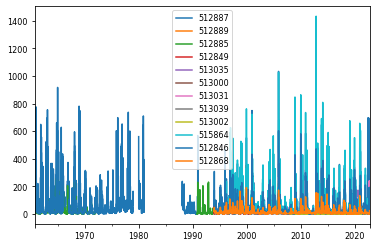

In [146]:
timeseriesfinal.plot()

In [147]:
timeseries_umbria = timeseriesfinal.copy()

In [148]:
#network_umbria.to_csv(r'IT\timeseries\network_umbria.csv') 
#timeseriesfinal.to_csv(r'IT\timeseries\timeseries_umbria.csv') 

#### (c) Valle d'Aosta:

In [149]:
path =r'IT\original\valledaosta'
filenames = glob.glob(path + "/*.csv")
len(filenames)

18

In [150]:
timeseriesfinal = pd.DataFrame(index = pd.date_range('10-01-1978','09-30-2022', freq='D'))

i = 0
for filename in tqdm.tqdm(filenames):
    
        
    timeseries_station = pd.read_csv(filename, encoding='latin-1', skiprows=7, delimiter = ";", header = None, 
                             names = ["dates", "Q_m3_s"], decimal=',')

    timeseries_station["dates"] = pd.to_datetime(timeseries_station["dates"], format='%Y-%m-%d')
    timeseries_station.set_index("dates", inplace = True)
    timeseries_station = timeseries_station.loc[timeseries_station.index.drop_duplicates(keep=False), :]
    
    station = pd.read_csv(filename, encoding='latin-1', skiprows=2, delimiter = ";", header = None, nrows = 1)
    station = station.iloc[:, 0].str.replace('Stazione: ',' ')
    
    timeseriesfinal.loc[:, station[0]] = timeseries_station.Q_m3_s
    
    i = i + 1

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 63.82it/s]


<AxesSubplot:>

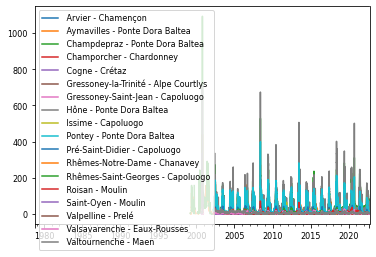

In [151]:
timeseriesfinal.plot()

In [152]:
#timeseriesfinal.to_csv(r'IT\timeseries\timeseries_valedaosta.csv') 
#timeseriesfinal.to_excel(r'IT\timeseries\timeseries_valedaosta.xlsx') 

In [153]:
# Here we can read the time-series network information:
network_valedaosta = pd.read_excel(r"IT\timeseries\network_valedaosta.xlsx")
names = ["ID", 'Code', 'Name', 'Lon', 'Lat', 'Elevation', "Area"]

network_valedaosta.columns = names
network_valedaosta.drop(["ID", "Elevation", "Area"], axis = 1, inplace = True)
network_valedaosta

Code                                  Name      Lon      Lat
0   1000                    Arvier - Chamençon  7.10742  45.6783
1   1020        Aymavilles - Ponte Dora Baltea  7.25257  45.7108
2   1100       CHAMPDEPRAZ - PONTE DORA BALTEA  7.67371  45.6818
3   1110              CHAMPORCHER - CHARDONNEY  7.60875  45.6206
4   1130                        Cogne - Crétaz  7.34048  45.6145
5   1260  Gressoney-la-Trinité - Alpe Courtlys  7.80761  45.8683
6   1290      Gressoney-Saint-Jean - Capoluogo  7.83249  45.7675
7   1310              HÔNE - PONTE DORA BALTEA  7.73993  45.6172
8   1320                    ISSIME - CAPOLUOGO  7.85621  45.6873
9   1480            Pontey - Ponte Dora Baltea  7.61737  45.7412
10  1490          Pré-Saint-Didier - Capoluogo  6.99078  45.7629
11  1520          Rhêmes-Notre-Dame - Chanavey  7.12338  45.5788
12  1550      Rhêmes-Saint-Georges - Capoluogo  7.15259  45.6497
13  1560                       Roisan - Moulin  7.30608  45.7865
14  1570                   Saint-Oyen - Moulin  7.20871  45.8209
15  1640                    Valpelline - Prelé  7.36902  45.8377
16  1650          Valsavarenche - Eaux-Rousses  7.20835  45.5668
17  1720                  Valtournenche - Maen  7.61112  45.8626

In [154]:
timeseriesfinal

Arvier - Chamençon   Aymavilles - Ponte Dora Baltea  \
1978-10-01                  NaN                              NaN   
1978-10-02                  NaN                              NaN   
1978-10-03                  NaN                              NaN   
1978-10-04                  NaN                              NaN   
1978-10-05                  NaN                              NaN   
...                         ...                              ...   
2022-09-26                  0.7                              8.6   
2022-09-27                  0.6                              8.4   
2022-09-28                  0.8                             12.5   
2022-09-29                  0.8                             13.2   
2022-09-30                  0.7                             11.0   

             Champdepraz - Ponte Dora Baltea   Champorcher - Chardonney  \
1978-10-01                               NaN                        NaN   
1978-10-02                               NaN                        NaN   
1978-10-03                               NaN                        NaN   
1978-10-04                               NaN                        NaN   
1978-10-05                               NaN                        NaN   
...                                      ...                        ...   
2022-09-26                              29.2                        0.0   
2022-09-27                              28.9                        0.0   
2022-09-28                              35.7                        0.0   
2022-09-29                              45.1                        0.0   
2022-09-30                              37.0                        0.0   

             Cogne - Crétaz   Gressoney-la-Trinité - Alpe Courtlys  \
1978-10-01              NaN                                    NaN   
1978-10-02              NaN                                    NaN   
1978-10-03              NaN                                    NaN   
1978-10-04              NaN                                    NaN   
1978-10-05              NaN                                    NaN   
...                     ...                                    ...   
2022-09-26              1.2                                    1.0   
2022-09-27              1.1                                    0.8   
2022-09-28              1.1                                    0.8   
2022-09-29              1.1                                    0.8   
2022-09-30              1.1                                    0.7   

             Gressoney-Saint-Jean - Capoluogo   Hône - Ponte Dora Baltea  \
1978-10-01                                NaN                        NaN   
1978-10-02                                NaN                        NaN   
1978-10-03                                NaN                        NaN   
1978-10-04                                NaN                        NaN   
1978-10-05                                NaN                        NaN   
...                                       ...                        ...   
2022-09-26                                2.0                       21.9   
2022-09-27                                1.8                       21.7   
2022-09-28                                1.7                       25.6   
2022-09-29                                1.8                       32.4   
2022-09-30                                1.7                       27.0   

             Issime - Capoluogo   Pontey - Ponte Dora Baltea  \
1978-10-01                  NaN                          NaN   
1978-10-02                  NaN                          NaN   
1978-10-03                  NaN                          NaN   
1978-10-04                  NaN                          NaN   
1978-10-05                  NaN                          NaN   
...                         ...                          ...   
2022-09-26                  1.4                          6.1   
2022-09-27                  1

In [155]:
timeseries_valedaosta = timeseriesfinal.copy()

In [156]:
timeseries_valedaosta.columns = network_valedaosta.Code
timeseries_valedaosta

Code        1000  1020  1100  1110  1130  1260  1290  1310  1320  1480  1490  \
1978-10-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1978-10-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1978-10-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1978-10-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1978-10-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2022-09-26   0.7   8.6  29.2   0.0   1.2   1.0   2.0  21.9   1.4   6.1   2.2   
2022-09-27   0.6   8.4  28.9   0.0   1.1   0.8   1.8  21.7   1.3   6.1   2.2   
2022-09-28   0.8  12.5  35.7   0.0   1.1   0.8   1.7  25.6   1.4   7.4   4.1   
2022-09-29   0.8  13.2  45.1   0.0   1.1   0.8   1.8  32.4   1.4   9.0   3.8   
2022-09-30   0.7  11.0  37.0   0.0   1.1   0.7   1.7  27.0   1.4   7.5   2.8   

Code        1520  1550  1560  1570  1640  1650  1720  
1978-10-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1978-10-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1978-10-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1978-10-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1978-10-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...   ...  
2022-09-26   NaN   3.3   1.4   1.7   0.9   0.8   2.7  
2022-09-27   NaN   3.3   1.3   1.7   0.9   0.8   3.2  
2022-09-28   NaN   3.6   1.5   1.8   1.0   0.9   3.0  
2022-09-29   NaN   3.3   1.4   1.8   0.9   0.9   3.0  
2022-09-30   NaN   3.3   1.3   1.8   0.9   0.8   3.0  

[16071 rows x 18 columns]

#### (d) Sardegna:

In [157]:
path =r'IT\original\sardegna'
filenames = glob.glob(path + "/*.xlsx")
len(filenames)

20

In [158]:
rows_to_keep =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
                 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

timeseries_station_df = pd.DataFrame(index = pd.date_range('09-01-1958','09-30-2022', freq='D'))

for filename in tqdm.tqdm(filenames):
    namestation = os.path.basename(filename)
    namestation = namestation.replace(".xlsx", "")
    
    #Here we read the data:
    timeseries_station = pd.read_excel(filename,  skiprows=3, header = 0, decimal=',')
    
    timeseries_station = timeseries_station.replace("*", "")
    timeseries_station = timeseries_station.replace(">>", np.nan) 
    timeseries_station = timeseries_station.replace('[','') 

    timeseries_station = timeseries_station.replace(']','', regex=True) 
    
    #timeseries_station = timeseries_station.replace("[]", "", regex=True) 
    timeseries_station = timeseries_station.replace(",", ".", regex=True) 
    
    # Here we create a list with the years:

    first_year = timeseries_station.columns[0]
    list_potential_years = list(range(first_year, 2023, 1))

    years_in_list  = timeseries_station[timeseries_station.iloc[:, 0].isin(list_potential_years)].iloc[:, 0].tolist()

    years_in_list.insert(0, first_year)

    timeseries_station = timeseries_station[timeseries_station.iloc[:, 0].isin(rows_to_keep)]
    timeseries_station = timeseries_station.iloc[:, 0:13]

    timeseries_station.columns = ["Day", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
    
    
    i = 28
    j = 29
    k = 30
    timeseries_station_2 = timeseries_station.copy()

    for year_for in years_in_list:
    
        # Day 30:
        timeseries_station_2.iloc[j,3:] = timeseries_station.iloc[j,2:-1].values
        timeseries_station_2.iloc[j,2] = np.nan     
        
        # Day 31:
        
        timeseries_station_2.iloc[k,3] = timeseries_station.iloc[k,2]
        timeseries_station_2.iloc[k,5] = timeseries_station.iloc[k,3]
        timeseries_station_2.iloc[k,7] = timeseries_station.iloc[k,4]
        timeseries_station_2.iloc[k,8] = timeseries_station.iloc[k,5]
        timeseries_station_2.iloc[k,10] = timeseries_station.iloc[k,6]
        timeseries_station_2.iloc[k,12] = timeseries_station.iloc[k,7]
        
        timeseries_station_2.iloc[k,2] = np.nan
        timeseries_station_2.iloc[k,4] = np.nan
        timeseries_station_2.iloc[k,6] = np.nan
        timeseries_station_2.iloc[k,9] = np.nan
        timeseries_station_2.iloc[k,11] = np.nan   
    
        if calendar.isleap(year_for):
        
            1 + 1
        

        
        else:
            # Day 29:
            timeseries_station_2.iloc[i,3:] = timeseries_station.iloc[i,2:-1].values
            timeseries_station_2.iloc[i,2] = np.nan 
        
        
        i = i + 31
        j = j + 31
        k = k + 31
        
    
    # Second loop:
    i = 0
    j = 0

    timeseries_station_numpy = timeseries_station_2.iloc[:, 1:].to_numpy()
    timeseries_station_aux_df = pd.DataFrame(index = range(timeseries_station_numpy.shape[0] * timeseries_station_numpy.shape[1]), 
                         columns =["dates", "Q_m3_s", "date"])

    for ano in years_in_list:
    
        for mes in range(1, 13):
        
            for dia in range(1, 32):
            
                timeseries_station_aux_df.iloc[i, 0] = str(dia) + "-" + str(mes) + "-" + str(ano)
                timeseries_station_aux_df.iloc[i, 1] = timeseries_station_numpy[j + dia - 1, mes - 1]
            
                i = i + 1
    
        j = j + 31    
        
        
    for dia in range(len(timeseries_station_aux_df)):
    
        try:
            timeseries_station_aux_df.iloc[dia, 2] = pd.to_datetime(timeseries_station_aux_df.iloc[dia, 0], format='%d-%m-%Y')
    
        except:
            timeseries_station_aux_df.iloc[dia, 2] = np.nan

            
    
    timeseries_station_aux_df.dropna(subset=['date'], inplace = True)
    timeseries_station_aux_df.drop("dates", axis = 1, inplace = True)
    timeseries_station_aux_df.set_index("date", inplace = True)

    timeseries_station_aux_df = timeseries_station_aux_df.astype(float)
    

    timeseries_station_df.loc[:, str(namestation)] =  timeseries_station_aux_df["Q_m3_s"]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:05<00:00,  3.27s/it]


In [159]:
timeseries_station_df

3010  3020  3030  3040  3050  3060  3070  3080  3090  3100  3110  \
1958-09-01   NaN   NaN  0.27   NaN   NaN   NaN   NaN  0.06   NaN   NaN   NaN   
1958-09-02   NaN   NaN  0.27   NaN   NaN   NaN   NaN  0.11   NaN   NaN   NaN   
1958-09-03   NaN   NaN  0.27   NaN   NaN   NaN   NaN  0.11   NaN   NaN   NaN   
1958-09-04   NaN   NaN  0.31   NaN   NaN   NaN   NaN  0.11   NaN   NaN   NaN   
1958-09-05   NaN   NaN  0.31   NaN   NaN   NaN   NaN  0.11   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2022-09-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2022-09-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2022-09-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2022-09-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2022-09-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            3120  3126  3130  3140  3150  3160  3180  3200  3220  
1958-09-01   NaN   NaN   NaN   0.0   0.0   0.0   NaN  0.02  0.01  
1958-09-02   NaN   NaN   NaN   0.0   0.0   0.0   NaN  0.01  0.01  
1958-09-03   NaN   NaN   NaN   0.0   0.0   0.0   NaN  0.01  0.01  
1958-09-04   NaN   NaN   NaN   0.0   0.0   0.0   NaN  0.02  0.01  
1958-09-05   NaN   NaN   NaN   0.0   0.0   0.0   NaN  0.02  0.01  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...  
2022-09-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2022-09-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2022-09-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2022-09-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2022-09-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[23406 rows x 20 columns]

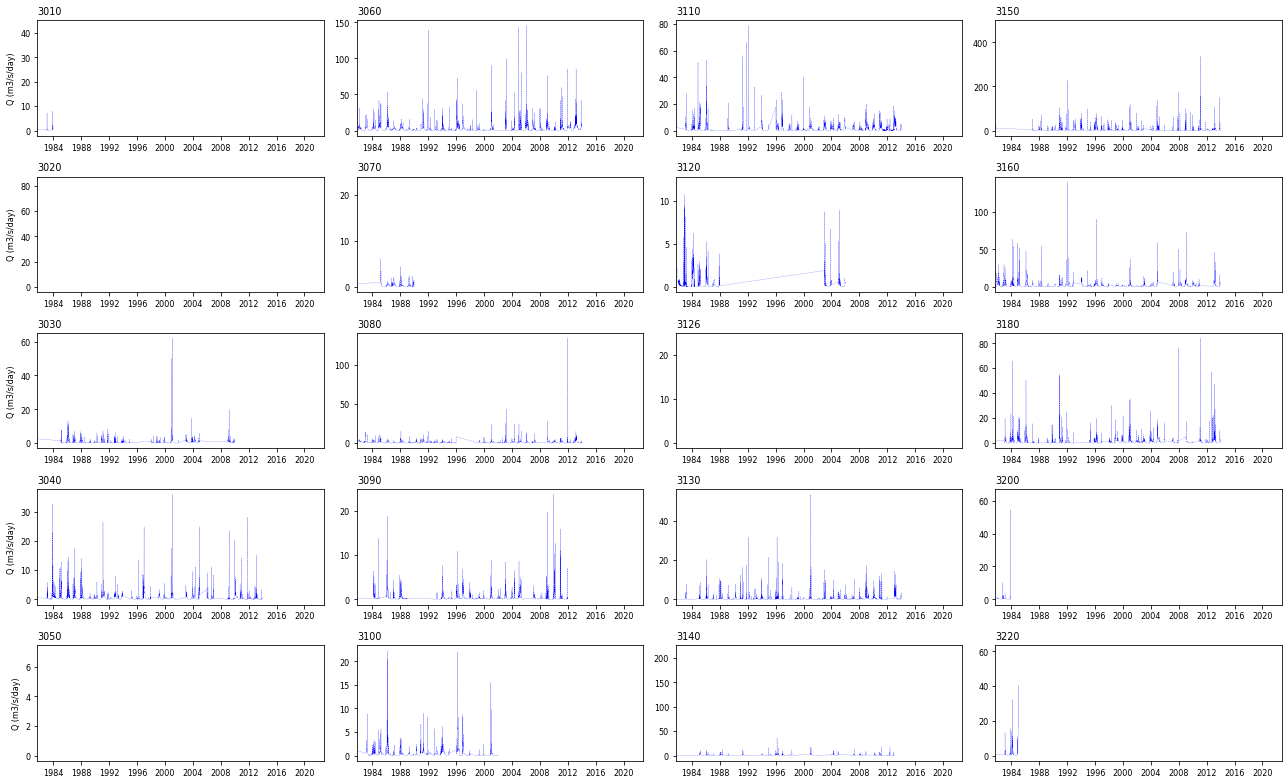

In [160]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 5, numc = 4, datatoplot = timeseries_station_df, 
                                   setylim = False, ymin = 0, ymax = 200, figsizeproj = (18, 11),
                                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  
                                   ylabelplot = "Q (m3/s/day)", 
                                   datestart = datetime.date(1981, 10, 1), dateend = datetime.date(2022, 9, 30),
                                   setnumberofintervals = False, numberintervals = 2,
                                   fontsize_plot = 10)

In [161]:
#timeseries_station_df.to_csv(r'IT\timeseries\timeseries_sardegna.csv')    

In [162]:
timeseries_sardegna = timeseries_station_df.copy()

In [163]:
# Here we can read the time-series network information:
network_sardegna = pd.read_excel(r"IT\timeseries\network_sardegna.xlsx")
names = ["ID", 'Code', 'River', 'Name', 'X', 'Y', "Elev", 'Lon', 'Lat']
network_sardegna.columns = names
network_sardegna.drop(["ID", "River", "Elev", "X", "Y"], axis = 1, inplace = True)
network_sardegna.Code

network_sardegna.Code = network_sardegna.Code.astype('str')
network_sardegna

Code                                        Name       Lon        Lat
0   3080                       ARAXISI A MEANA SARDO  9.064089  39.961766
1   3110           BADU CRABOLU A PONTE BADU CRABOLU  8.596855  40.332871
2   3120                 BIDIGHINZU A Pte BIDIGHINZU  8.685114  40.524251
3   3140                BUTTULE (COGHINAS) A BUTTULE  8.931748  40.569146
4   3130               CALAMBRU (COGHINAS) A BONORVA  8.878512  40.460393
5   3090        CISPIRI (M. DI S. LUSS.) A BONARCADO  8.699803  40.117538
6   3000                               CIXERRI A UTA  8.947249  39.279031
7   3170                    COGHINAS A C.ra COGHINAS  8.960243  40.863135
8   3215                         FLUMENDOSA A BALLAO  9.353843  39.554228
9   3210                     FLUMENDOSA A VILLAPUTZU  9.564394  39.431082
10  3030               FLUMINIMAGGIORE A FLUMINIMAG.  8.500080  39.434329
11  3150        MANNU DI BERCHIDDA (COGH.) A BERCHID  9.148027  40.755460
12  3100               MANNU DI CUGLIERI A Pte LOBOS  8.539148  40.234158
13  3160      MANNU DI OSCHIRI (COGH) A CONCARABELLA  9.145123  40.743654
14  3145                   MANNU DI OZIERI A FRAIGAS  8.992605  40.625543
15  3190                                    SA TEULA  9.657435  39.963309
16  3040  TERRAMAISTUS (M.di PABIL) A GONNOSFANADIGA  8.626010  39.506516
17  3066                          TIRSO A PASSERELLA  9.032372  40.337705
18  3065                           TIRSO A PONTE F.C  9.033836  40.321939
19  3060                   TIRSO A RIFORNITORE TIRSO  9.035168  40.326065
20  3180                       VIGNOLA A Pte VIGNOLA  9.048544  41.120330

In [164]:
network_sardegna.dtypes

Code     object
Name     object
Lon     float64
Lat     float64
dtype: object

#### (e) Piemonte:

In [165]:
path =r'IT\original\piemonte'
filenames = glob.glob(path + "/*.csv")
len(filenames)

72

In [166]:
timeseriesfinal = pd.DataFrame(index = pd.date_range('10-01-1978','09-30-2022', freq='D'))

i = 0
for filename in tqdm.tqdm(filenames):
    
    namestation = os.path.basename(filename)
    namestation = namestation.split("_", 1)[0]
    
    timeseries_station = pd.read_csv(filename, delimiter = ";", encoding='latin-1', usecols=[0, 1], decimal=',')
    timeseries_station.columns = ["dates", "Q_m3_s"]
    timeseries_station["dates"] = pd.to_datetime(timeseries_station["dates"], format='%d/%m/%Y')
    timeseries_station.set_index("dates", inplace = True)

        
    timeseriesfinal.loc[:, namestation] = timeseries_station.Q_m3_s
    
    i = i + 1

100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [00:01<00:00, 42.87it/s]


In [167]:
timeseriesfinal

ALESSANDRIA BORMIDA  ASTI TANARO  BASALUZZO ORBA  \
1978-10-01                  NaN          NaN             NaN   
1978-10-02                  NaN          NaN             NaN   
1978-10-03                  NaN          NaN             NaN   
1978-10-04                  NaN          NaN             NaN   
1978-10-05                  NaN          NaN             NaN   
...                         ...          ...             ...   
2022-09-26                  NaN          NaN             NaN   
2022-09-27                  NaN          NaN             NaN   
2022-09-28                  NaN          NaN             NaN   
2022-09-29                  NaN          NaN             NaN   
2022-09-30                  NaN          NaN             NaN   

            BEAULARD DORA DI BARDONECCHIA  BRANDIZZO MALONE  BUSCA MAIRA  \
1978-10-01                            NaN               NaN          NaN   
1978-10-02                            NaN               NaN          NaN   
1978-10-03                            NaN               NaN          NaN   
1978-10-04                            NaN               NaN          NaN   
1978-10-05                            NaN               NaN          NaN   
...                                   ...               ...          ...   
2022-09-26                            NaN               NaN          NaN   
2022-09-27                            NaN               NaN          NaN   
2022-09-28                            NaN               NaN          NaN   
2022-09-29                            NaN               NaN          NaN   
2022-09-30                            NaN               NaN          NaN   

            CALTIGNAGA TERDOPPIO  CAMERANA BORMIDA  CAMPERTOGNO SESIA  \
1978-10-01                   NaN               NaN                NaN   
1978-10-02                   NaN               NaN                NaN   
1978-10-03                   NaN               NaN                NaN   
1978-10-04                   NaN               NaN                NaN   
1978-10-05                   NaN               NaN                NaN   
...                          ...               ...                ...   
2022-09-26                   NaN               NaN                NaN   
2022-09-27                   NaN               NaN                NaN   
2022-09-28                   NaN               NaN                NaN   
2022-09-29                   NaN               NaN                NaN   
2022-09-30                   NaN               NaN                NaN   

            CANDOGLIA TOCE  ...  TIGLIETO ORBA  TORINO DORA RIPARIA  \
1978-10-01             NaN  ...            NaN                  NaN   
1978-10-02             NaN  ...            NaN                  NaN   
1978-10-03             NaN  ...            NaN                  NaN   
1978-10-04             NaN  ...            NaN                  NaN   
1978-10-05             NaN  ...            NaN                  NaN   
...                    ...  ...            ...                  ...   
2022-09-26             NaN  ...            NaN                  NaN   
2022-09-27             NaN  ...            NaN                  NaN   
2022-09-28             NaN  ...            NaN                  NaN   
2022-09-29             NaN  ...            NaN                  NaN   
2022-09-30             NaN  ...            NaN                  NaN   

            TORINO STURA DI LANZO  TRANA SANGONE  VALENZA PO  \
1978-10-01                    NaN            NaN         NaN   
1978-10-02                    NaN            NaN         NaN   
1978-10-03                    NaN            NaN         NaN   
1978-10-04                    NaN            NaN         NaN   
1978-10-05                    NaN            NaN         NaN   
...                           ...            ...         ...   
2022-09-26                    NaN            NaN         NaN   
2022-09-27                    NaN            NaN         NaN   
2022-09-28              

In [168]:
network_piemonte_aux = pd.read_csv(r"IT\stations\network_piemonte.csv", delimiter = ";", encoding='latin-1', decimal=',')
network_piemonte_aux.set_index("DENOMINAZIONE", inplace = True)
network_piemonte_aux

COMUNE                           PROVINCIA  \
DENOMINAZIONE                                                                
ALPE CHEGGIO        ANTRONA SCHIERANCO  PROVINCIA DEL VERBANO CUSIO OSSOLA   
ALPE DEVERO                     BACENO  PROVINCIA DEL VERBANO CUSIO OSSOLA   
ANZINO                   BANNIO ANZINO  PROVINCIA DEL VERBANO CUSIO OSSOLA   
LAGO PAIONE                   BOGNANCO  PROVINCIA DEL VERBANO CUSIO OSSOLA   
PIZZANCO                      BOGNANCO  PROVINCIA DEL VERBANO CUSIO OSSOLA   
...                                ...                                 ...   
TRICERRO                      TRICERRO               PROVINCIA DI VERCELLI   
VARALLO                        VARALLO               PROVINCIA DI VERCELLI   
VARALLO MASTALLONE             VARALLO               PROVINCIA DI VERCELLI   
VERCELLI                      VERCELLI               PROVINCIA DI VERCELLI   
MONCENISIO LAGO       NAZIONE: FRANCIA                    PROVINCIA ESTERA   

                          BACINO  \
DENOMINAZIONE                      
ALPE CHEGGIO              TICINO   
ALPE DEVERO               TICINO   
ANZINO                    TICINO   
LAGO PAIONE               TICINO   
PIZZANCO                  TICINO   
...                          ...   
TRICERRO                   SESIA   
VARALLO                    SESIA   
VARALLO MASTALLONE         SESIA   
VERCELLI                   SESIA   
MONCENISIO LAGO     DORA RIPARIA   

                                                             LOCALITA  QUOTA  \
DENOMINAZIONE                                                                  
ALPE CHEGGIO                                             ALPE CHEGGIO   1460   
ALPE DEVERO                                               ALPE DEVERO   1634   
ANZINO                                                         ANZINO    669   
LAGO PAIONE                                     LAGO PAIONE SUPERIORE   2269   
PIZZANCO                                                     PIZZANCO   1142   
...                                                               ...    ...   
TRICERRO                                                     TRICERRO    139   
VARALLO                                        VIVAIO FORESTALE CROSA    470   
VARALLO MASTALLONE                                           LE FOLLE    485   
VERCELLI                                            CASELLO RUGGERINA    132   
MONCENISIO LAGO     HAUTE MAURIENNE - LANSLEBOURG-MONT-CENIS - PAS...   2000   

                   TIPO_STAZIONE  LATITUDINE  LONGITUDINE   UTM_X    UTM_Y  \
DENOMINAZIONE                                                                
ALPE CHEGGIO                 NPT      460510        80700  431628  5103881   
ALPE DEVERO                 HNPT      461901        81540  443031  5129425   
ANZINO                        PT      455916        80925  434627  5092919   
LAGO PAIONE                HPRTV      461037        81129  437505  5113919   
PIZZANCO                     HPT      460730        81044  436473  5108156   
...                          ...         ...          ...     ...      ...   
TRICERRO                     GPT      451409        81951  447397  5009263   
VARALLO                      HPT      454914        81630  443587  5074258   
VARALLO MASTALLONE             I      454953        81524  442188  5075482   
VERCELLI                GHNPRTVW      451932        82326  452154  5019188   
MONCENISIO LAGO               PT      451322        65641  338562  5009648   

                   DATA_INIZIO  
DENOMINAZIONE                   
ALPE CHEGGIO        05-11-1996  
ALPE DEVERO         29-10-1991  
ANZINO              24-11-2000  
LAGO PAIONE         15-06-1996  
PIZZANCO            31-10-1991  
...                        ...  
TRICERRO            11-12-2000  
VARALLO             01-03-1989  
VARALLO MASTALLONE  24-11-1999  
VERCELLI            17-06-1993  
MONCENISIO LAGO     22-06-2005  

[378 rows x 11 columns]

In [169]:
network_piemonte = pd.DataFrame(index = timeseriesfinal.columns, data = network_piemonte_aux)
network_piemonte["lat"] = network_piemonte.LATITUDINE / 10000
network_piemonte["lon"] = network_piemonte.LONGITUDINE / 10000
network_piemonte

COMUNE                 PROVINCIA  \
ALESSANDRIA BORMIDA                     ALESSANDRIA  PROVINCIA DI ALESSANDRIA   
ASTI TANARO                                    ASTI         PROVINCIA DI ASTI   
BASALUZZO ORBA                            BASALUZZO  PROVINCIA DI ALESSANDRIA   
BEAULARD DORA DI BARDONECCHIA                  OULX       PROVINCIA DI TORINO   
BRANDIZZO MALONE                          BRANDIZZO       PROVINCIA DI TORINO   
...                                             ...                       ...   
VARALLO MASTALLONE                          VARALLO     PROVINCIA DI VERCELLI   
VEROLENGO DORA BALTEA                     VEROLENGO       PROVINCIA DI TORINO   
VIGLIANO CERVO                    VIGLIANO BIELLESE       PROVINCIA DI BIELLA   
VILLAFRANCA PELLICE            VILLAFRANCA PIEMONTE       PROVINCIA DI TORINO   
VOLPEDO CURONE                             MONLEALE  PROVINCIA DI ALESSANDRIA   

                                     BACINO  \
ALESSANDRIA BORMIDA                  TANARO   
ASTI TANARO                          TANARO   
BASALUZZO ORBA                       TANARO   
BEAULARD DORA DI BARDONECCHIA  DORA RIPARIA   
BRANDIZZO MALONE                         PO   
...                                     ...   
VARALLO MASTALLONE                    SESIA   
VEROLENGO DORA BALTEA           DORA BALTEA   
VIGLIANO CERVO                        SESIA   
VILLAFRANCA PELLICE                 PELLICE   
VOLPEDO CURONE                       CURONE   

                                                            LOCALITA   QUOTA  \
ALESSANDRIA BORMIDA                                    PONTE S.S. 10    96.0   
ASTI TANARO                                             BORGO TANARO   117.0   
BASALUZZO ORBA                 TRAVERSA DERIVAZIONE CANALE FRESONARA   125.0   
BEAULARD DORA DI BARDONECCHIA                         PONTE S.S. 335  1149.0   
BRANDIZZO MALONE                                   PONTE S.S. 31 BIS   192.0   
...                                                              ...     ...   
VARALLO MASTALLONE                                          LE FOLLE   485.0   
VEROLENGO DORA BALTEA                              PONTE S.S. 31 BIS   167.0   
VIGLIANO CERVO                                       PONTE S.P.  301   327.0   
VILLAFRANCA PELLICE                                   PONTE S.P. 139   260.0   
VOLPEDO CURONE                                              MONREALE   182.0   

                              TIPO_STAZIONE  LATITUDINE  LONGITUDINE  \
ALESSANDRIA BORMIDA                       I    445423.0      83848.0   
ASTI TANARO                            HIPT    445309.0      81248.0   
BASALUZZO ORBA                            I    444606.0      84022.0   
BEAULARD DORA DI BARDONECCHIA            IT    450252.0      64533.0   
BRANDIZZO MALONE                        IPT    451826.0      78519.0   
...                                     ...         ...          ...   
VARALLO MASTALLONE                        I    454953.0      81524.0   
VEROLENGO DORA BALTEA                     I    451135.0      80232.0   
VIGLIANO CERVO                            I    453319.0      80644.0   
VILLAFRANCA PELLICE                     IPT    444847.0      73002.0   
VOLPEDO CURONE                            I    445317.0      85902.0   

                                  UTM_X      UTM_Y DATA_INIZIO      lat  \
ALESSANDRIA BORMIDA            472014.0  4972515.0  19-05-1998  44.5423   
ASTI TANARO                    437790.0  4970464.0  19-05-1998  44.5309   
BASALUZZO ORBA                 474018.0  4957174.0  02-10-2000  44.4606   
BEAULARD DORA DI BARDONECCHIA  323447.0  4990584.0  01-01-1997  45.0252   
BRANDIZZO MALONE               409801.0  5003793.0  06-12-2000  45.1826   
...                                 ...        ...         ...      ...   
VARALLO MASTALLONE             442188.0  5075482.0  24-11-1999  45.4953   
VEROLENGO DORA BALTEA          424687.0  5004727.0  07-06-2000  45.1135   
VIGLIA

In [170]:
#timeseriesfinal.to_csv(r'IT\timestimeseries_piemonteeries\.csv')    
#network_piemonte.to_csv(r'IT\timeseries\network_piemonte.csv')    

In [171]:
timeseries_piemonte = timeseriesfinal.copy()

<AxesSubplot:>

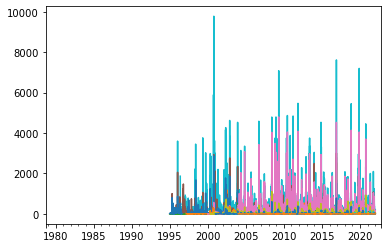

In [172]:
timeseries_piemonte.plot(legend = False)

In [173]:
# Here we can read the time-series network information:
network_piemonte = pd.read_excel(r"IT\timeseries\network_piemonte.xlsx", usecols = ["field_1", "LOCALITA", "xcoord", "ycoord"])

names = ['Code', 'Name', 'Lon', 'Lat']
network_piemonte.columns = names


network_piemonte

Code                                   Name  \
0             ALESSANDRIA BORMIDA                          PONTE S.S. 10   
1                     ASTI TANARO                           BORGO TANARO   
2                  BASALUZZO ORBA  TRAVERSA DERIVAZIONE CANALE FRESONARA   
3   BEAULARD DORA DI BARDONECCHIA                         PONTE S.S. 335   
4                BRANDIZZO MALONE                      PONTE S.S. 31 BIS   
..                            ...                                    ...   
67             VARALLO MASTALLONE                               LE FOLLE   
68          VEROLENGO DORA BALTEA                      PONTE S.S. 31 BIS   
69                 VIGLIANO CERVO                        PONTE S.P.  301   
70            VILLAFRANCA PELLICE                         PONTE S.P. 139   
71                 VOLPEDO CURONE                               MONREALE   

         Lon        Lat  
0   8.644459  44.903725  
1   8.211240  44.883092  
2   8.670630  44.765702  
3   6.757124  45.044904  
4   7.850913  45.180056  
..       ...        ...  
67  8.254615  45.828682  
68  8.040208  45.190211  
69  8.110058  45.552484  
70  7.498423  44.810264  
71  8.981878  44.885247  

[72 rows x 4 columns]

#### (f) Trento:

In [174]:
path =r'IT\original\trento'
filenames = glob.glob(path + "/*.csv")
len(filenames)

35

In [175]:
filename = filenames[1]
filename

'IT\\original\\trento\\borgo_valsugana_fiume_brenta_portate_calcolate_19940728000000_20200930234500.csv'

In [176]:
filenames

['IT\\original\\trento\\avio_torrente_aviana_portate_calcolate_20050128000000_20221231234500.csv',
 'IT\\original\\trento\\borgo_valsugana_fiume_brenta_portate_calcolate_19940728000000_20200930234500.csv',
 'IT\\original\\trento\\campitello_avisio_torrente_avisio_portate_calcolate_20050621000000_20200930234500.csv',
 'IT\\original\\trento\\cavalese_masi_torrente_avisio_portate_calcolate_19940601000000_20230228234500.csv',
 'IT\\original\\trento\\cimego_fiume_chiese_portate_calcolate_19940727000000_20191130234500.csv',
 'IT\\original\\trento\\dro_fiume_sarca_portate_calcolate_20051013000000_20201228234500.csv',
 'IT\\original\\trento\\fiera_di_primiero_torrente_cismon_portate_calcolate_19940728000000_20200930234500.csv',
 'IT\\original\\trento\\grigno_paese_torrente_grigno_portate_calcolate_20050701000000_20200930234500.csv',
 'IT\\original\\trento\\grigno_ponte_filippini_fiume_brenta_portate_calcolate_19940728000000_20221231234500.csv',
 'IT\\original\\trento\\lavis_torrente_avisio_por

In [177]:
timeseriesfinal = pd.DataFrame(index = pd.date_range('10-01-1978','12-31-2022', freq='D'))

for filename in filenames:
    
    timeseries_station = pd.read_csv(filename, delimiter = ",", encoding='latin-1', skiprows = 6, decimal='.')
    timeseries_station.columns = ["dates", "Q_m3_s"]
    timeseries_station["dates"] = pd.to_datetime(timeseries_station["dates"], format='%Y-%m-%d')
    timeseries_station.set_index("dates", inplace = True)

    timeseries_station = timeseries_station.resample('D').mean()

    namestation = pd.read_csv(filename, delimiter = ",", encoding='latin-1', skiprows = 3, nrows = 1)
    namestation = namestation.iloc[0,1]
    
        
    timeseriesfinal.loc[:, namestation] = timeseries_station.Q_m3_s
    
    print(namestation)
    

Avio
Borgo Valsugana
Campitello Avisio
Cavalese Masi
Cimego
Dro
Fiera di Primiero
Grigno Paese
Grigno Ponte Filippini
Lavis
Malé
Marco
Mezzolombardo Ponte Rupe
Pieve di Bono
Pinzolo Sarca
Ponte Arche
Ponte dei Tedeschi
Predazzo Avisio
Predazzo Travignolo
Preore
Ragoli
Rovereto Ponte Zigherane
Sarche Ponte del Gobbo
Soraga
Spiazzo
Stedileri
S Bernardo Rabbi
S Michele all Adige
Torbole
Trento Fersina
Trento Ponte S Lorenzo
Val Genova P S Maria
Vermiglio
Villa Lagarina
Vò Destro


In [178]:
timeseriesfinal

Avio  Borgo Valsugana  Campitello Avisio  Cavalese Masi  \
1978-10-01       NaN              NaN                NaN            NaN   
1978-10-02       NaN              NaN                NaN            NaN   
1978-10-03       NaN              NaN                NaN            NaN   
1978-10-04       NaN              NaN                NaN            NaN   
1978-10-05       NaN              NaN                NaN            NaN   
...              ...              ...                ...            ...   
2022-12-27  1.664167              NaN                NaN       3.815521   
2022-12-28  1.651042              NaN                NaN       3.682813   
2022-12-29  1.630729              NaN                NaN       3.897083   
2022-12-30  1.714271              NaN                NaN       3.866042   
2022-12-31  1.556771              NaN                NaN       3.739896   

            Cimego  Dro  Fiera di Primiero  Grigno Paese  \
1978-10-01     NaN  NaN                NaN           NaN   
1978-10-02     NaN  NaN                NaN           NaN   
1978-10-03     NaN  NaN                NaN           NaN   
1978-10-04     NaN  NaN                NaN           NaN   
1978-10-05     NaN  NaN                NaN           NaN   
...            ...  ...                ...           ...   
2022-12-27     NaN  NaN                NaN           NaN   
2022-12-28     NaN  NaN                NaN           NaN   
2022-12-29     NaN  NaN                NaN           NaN   
2022-12-30     NaN  NaN                NaN           NaN   
2022-12-31     NaN  NaN                NaN           NaN   

            Grigno Ponte Filippini  Lavis  ...  Stedileri  S Bernardo Rabbi  \
1978-10-01                     NaN    NaN  ...        NaN               NaN   
1978-10-02                     NaN    NaN  ...        NaN               NaN   
1978-10-03                     NaN    NaN  ...        NaN               NaN   
1978-10-04                     NaN    NaN  ...        NaN               NaN   
1978-10-05                     NaN    NaN  ...        NaN               NaN   
...                            ...    ...  ...        ...               ...   
2022-12-27                7.851771    NaN  ...        NaN          0.918021   
2022-12-28                7.771563    NaN  ...        NaN          0.916146   
2022-12-29                7.803646    NaN  ...        NaN          0.903750   
2022-12-30                7.811146    NaN  ...        NaN          0.898646   
2022-12-31                7.713333    NaN  ...        NaN          0.902917   

            S Michele all Adige  Torbole  Trento Fersina  \
1978-10-01                  NaN      NaN             NaN   
1978-10-02                  NaN      NaN             NaN   
1978-10-03                  NaN      NaN             NaN   
1978-10-04                  NaN      NaN             NaN   
1978-10-05                  NaN      NaN             NaN   
...                         ...      ...             ...   
2022-12-27            72.761250      NaN        1.138229   
2022-12-28            71.274896      NaN        1.188646   
2022-12-29            72.569896      NaN        1.020521   
2022-12-30            72.146458      NaN        1.157292   
2022-12-31            84.300417      NaN        1.190000   

            Trento Ponte S Lorenzo  Val Genova P S Maria  Vermiglio  \
1978-10-01                     NaN                   NaN        NaN   
1978-10-02                     NaN                   NaN        NaN   
1978-10-03                     NaN                   NaN        NaN   
1978-10-04                     NaN                   NaN        NaN   
1978-10-05                     NaN                   NaN        NaN   
...                            ...                   ...        ...   
2022-12-27               79.198333                   NaN   0.595000   
2022-12-28               78.970729                   NaN   0.584687   
2022-12-29               83.683854                   NaN   0.586562   
2022-12-30    

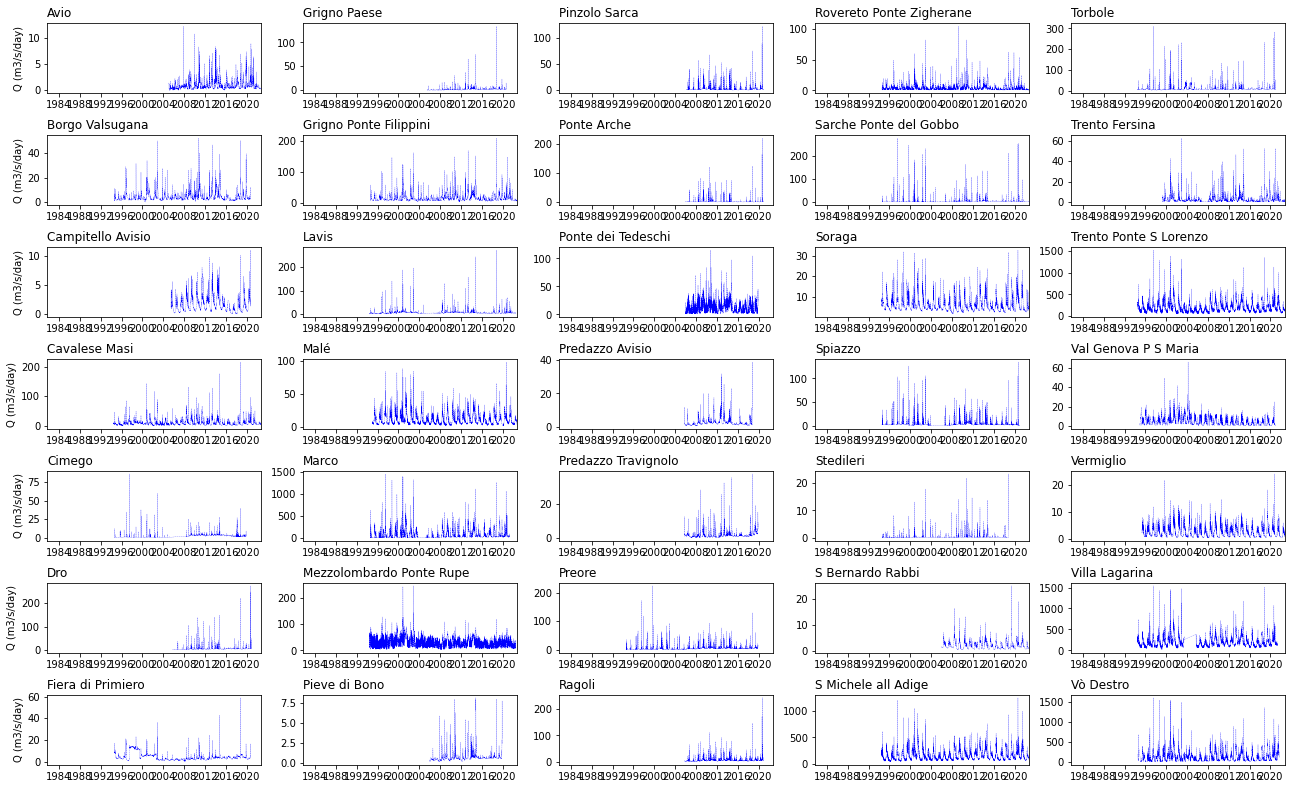

In [179]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 7, numc = 5, datatoplot = timeseriesfinal, 
                                   setylim = False, ymin = 0, ymax = 200, figsizeproj = (18, 11),
                                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  
                                   ylabelplot = "Q (m3/s/day)", 
                                   datestart = datetime.date(1981, 10, 1), dateend = datetime.date(2022, 9, 30),
                                   setnumberofintervals = False, numberintervals = 2,
                                   fontsize_plot = 8)

In [180]:
#timeseriesfinal.to_csv(r'IT\timeseries\timeseries_trento.csv')    
#timeseriesfinal.to_excel(r'IT\timeseries\timeseries_trento.xlsx') 

In [181]:
# At this part we copy the time-series data into a specific dataframe:
timeseries_trento = timeseriesfinal.copy()

In [182]:
# Here we can read the time-series network information:
network_trento = pd.read_excel(r"IT\timeseries\network_trento.xlsx", usecols = ["Code", "River", "Lon", "Lat"])

names = ['Code', 'Name', 'Lon', 'Lat']
network_trento.columns = names


network_trento

Code                         Name        Lon  \
0                       Avio              torrente Aviana  10.937376   
1            Borgo Valsugana                 fiume Brenta  11.460107   
2          Campitello Avisio              torrente Avisio  11.744702   
3              Cavalese Masi              torrente Avisio  11.479977   
4                     Cimego                 fiume Chiese  10.621964   
5                        Dro                  fiume Sarca  10.907966   
6          Fiera di Primiero              torrente Cismon  11.829937   
7               Grigno Paese              torrente Grigno  11.636856   
8     Grigno Ponte Filippini                 fiume Brenta  11.644513   
9                      Lavis              torrente Avisio  11.118599   
10                      Malé                   fiume Noce  10.913822   
11                     Marco                  fiume Adige  11.000874   
12  Mezzolombardo Ponte Rupe                   fiume Noce  11.103355   
13             Pieve di Bono               torrente Adanà  10.644892   
14             Pinzolo Sarca                  fiume Sarca  10.755904   
15               Ponte Arche                  fiume Sarca  10.870286   
16        Ponte dei Tedeschi                 fiume Chiese  10.544908   
17           Predazzo Avisio              torrente Avisio  11.595946   
18       Predazzo Travignolo          torrente Travignolo  11.601330   
19                    Preore                  fiume Sarca  10.750111   
20                    Ragoli                  fiume Sarca  10.785689   
21  Rovereto Ponte Zigherane                   fiume Leno  11.022282   
22          S Bernardo Rabbi             torrente Rabbies  10.844507   
23       S Michele all Adige                  fiume Adige  11.132340   
24    Sarche Ponte del Gobbo                  fiume Sarca  10.946496   
25                    Soraga              torrente Avisio  11.666753   
26                   Spiazzo                  fiume Sarca  10.738969   
27                 Stedileri  torrente Leno di Terragnolo  11.171923   
28                   Torbole                  fiume Sarca  10.882831   
29            Trento Fersina             torrente Fersina  11.117988   
30    Trento Ponte S Lorenzo                  fiume Adige  11.115010   
31      Val Genova P S Maria     torrente Sarca di Genova  10.661162   
32                 Vermiglio         torrente Vermigliana  10.684134   
33            Villa Lagarina                  fiume Adige  11.038306   
34                 Vò Destro                  fiume Adige  10.957414   

          Lat  
0   45.731604  
1   46.054072  
2   46.474532  
3   46.284856  
4   45.915279  
5   45.963707  
6   46.174083  
7   46.015194  
8   46.004275  
9   46.138110  
10  46.347113  
11  45.839060  
12  46.193669  
13  45.945457  
14  46.155403  
15  46.037393  
16  45.817400  
17  46.310131  
18  46.308378  
19  46.042482  
20  46.050153  
21  45.880930  
22  46.400247  
23  46.195162  
24  46.033010  
25  46.393701  
26  46.102176  
27  45.867653  
28  45.883986  
29  46.043983  
30  46.070134  
31  46.166699  
32  46.290329  
33  45.912623  
34  45.735043

#### (g) Lombardia:

For Lombardia we have the data available from their anais, converted to CSV and uploaded, and more information sent by them. We need to merge the two information in a single dataframe:

1. Part 1: Data from PDF:

In [51]:
path =r'IT\original\lombardia'
filenames = glob.glob(path + "/*.csv")
len(filenames)

22

In [52]:
timeseries_station_df = pd.DataFrame(index = pd.date_range('09-01-1958','12-31-2022', freq='D'))

for filename in tqdm.tqdm(filenames):
    
    network_infos = pd.read_csv(filename,  sep=";", header=None, encoding='latin-1', skiprows=0)
    year_start = int(network_infos.iloc[3, 10])
    namestation = network_infos.iloc[2, 2]


    timeseries_station = pd.read_csv(filename,  sep=";", header=0, encoding='latin-1', skiprows=7)
    # Here we can get rid of the characteres in the numerical values:

    for col in timeseries_station.columns:
    
        timeseries_station[col] = timeseries_station[col].str.replace('^', '', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('*', '', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('NaNA', 'NaN', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('NaNM', 'NaN', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('NaNT', 'NaN', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('#', '', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('E', '', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('!', '', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('$', '', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('B', '', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('Y', '', regex = True)
        timeseries_station[col] = timeseries_station[col].str.replace('A', '', regex = True)
        
    # Here we have the rows to keep:
    rows_to_keep =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 
                 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
    rows_to_keep = [str(x) for x in rows_to_keep]

    timeseries_station = timeseries_station[timeseries_station.iloc[:, 1].isin(rows_to_keep)]
    timeseries_station = timeseries_station.iloc[:, 1:14]

    timeseries_station.columns = ["Day", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
    
    years_in_list = list(range(year_start, year_start + int(len(timeseries_station)/31)))
    
    i = 28
    j = 29
    k = 30
    timeseries_station_2 = timeseries_station.copy()

    for year_for in years_in_list:
    
        # Day 30:
        timeseries_station_2.iloc[j,3:] = timeseries_station.iloc[j,2:-1].values
        timeseries_station_2.iloc[j,2] = np.nan     
        
        # Day 31:
        
        timeseries_station_2.iloc[k,3] = timeseries_station.iloc[k,2]
        timeseries_station_2.iloc[k,5] = timeseries_station.iloc[k,3]
        timeseries_station_2.iloc[k,7] = timeseries_station.iloc[k,4]
        timeseries_station_2.iloc[k,8] = timeseries_station.iloc[k,5]
        timeseries_station_2.iloc[k,10] = timeseries_station.iloc[k,6]
        timeseries_station_2.iloc[k,12] = timeseries_station.iloc[k,7]
        
        timeseries_station_2.iloc[k,2] = np.nan
        timeseries_station_2.iloc[k,4] = np.nan
        timeseries_station_2.iloc[k,6] = np.nan
        timeseries_station_2.iloc[k,9] = np.nan
        timeseries_station_2.iloc[k,11] = np.nan   
    
        if calendar.isleap(year_for):
        
            1 + 1
        

        
        else:
            # Day 29:
            timeseries_station_2.iloc[i,3:] = timeseries_station.iloc[i,2:-1].values
            timeseries_station_2.iloc[i,2] = np.nan 
        
        
        i = i + 31
        j = j + 31
        k = k + 31
       
    
    
    # Second loop:
    i = 0
    j = 0

    timeseries_station_numpy = timeseries_station_2.iloc[:, 1:].to_numpy()
    timeseries_station_aux_df = pd.DataFrame(index = range(timeseries_station_numpy.shape[0] * timeseries_station_numpy.shape[1]), 
                         columns =["dates", "Q_m3_s", "date"])

    for ano in years_in_list:
    
        for mes in range(1, 13):
        
            for dia in range(1, 32):
            
                timeseries_station_aux_df.iloc[i, 0] = str(dia) + "-" + str(mes) + "-" + str(ano)
                timeseries_station_aux_df.iloc[i, 1] = timeseries_station_numpy[j + dia - 1, mes - 1]
            
                i = i + 1
    
        j = j + 31    
        
        
    for dia in range(len(timeseries_station_aux_df)):
    
        try:
            timeseries_station_aux_df.iloc[dia, 2] = pd.to_datetime(timeseries_station_aux_df.iloc[dia, 0], format='%d-%m-%Y')
    
        except:
            timeseries_station_aux_df.iloc[dia, 2] = np.nan

            
    
    timeseries_station_aux_df.dropna(subset=['date'], inplace = True)
    timeseries_station_aux_df.drop("dates", axis = 1, inplace = True)
    timeseries_station_aux_df.set_index("date", inplace = True)

    timeseries_station_aux_df = timeseries_station_aux_df.astype(float)
    

    timeseries_station_df.loc[:, str(namestation)] =  timeseries_station_aux_df["Q_m3_s"]


100%|███████████████████████████████████████████████████████████████████████| 22/22 [00:49<00:00,  2.26s/it]


In [53]:
timeseries_stations_PDF = timeseries_station_df.copy()

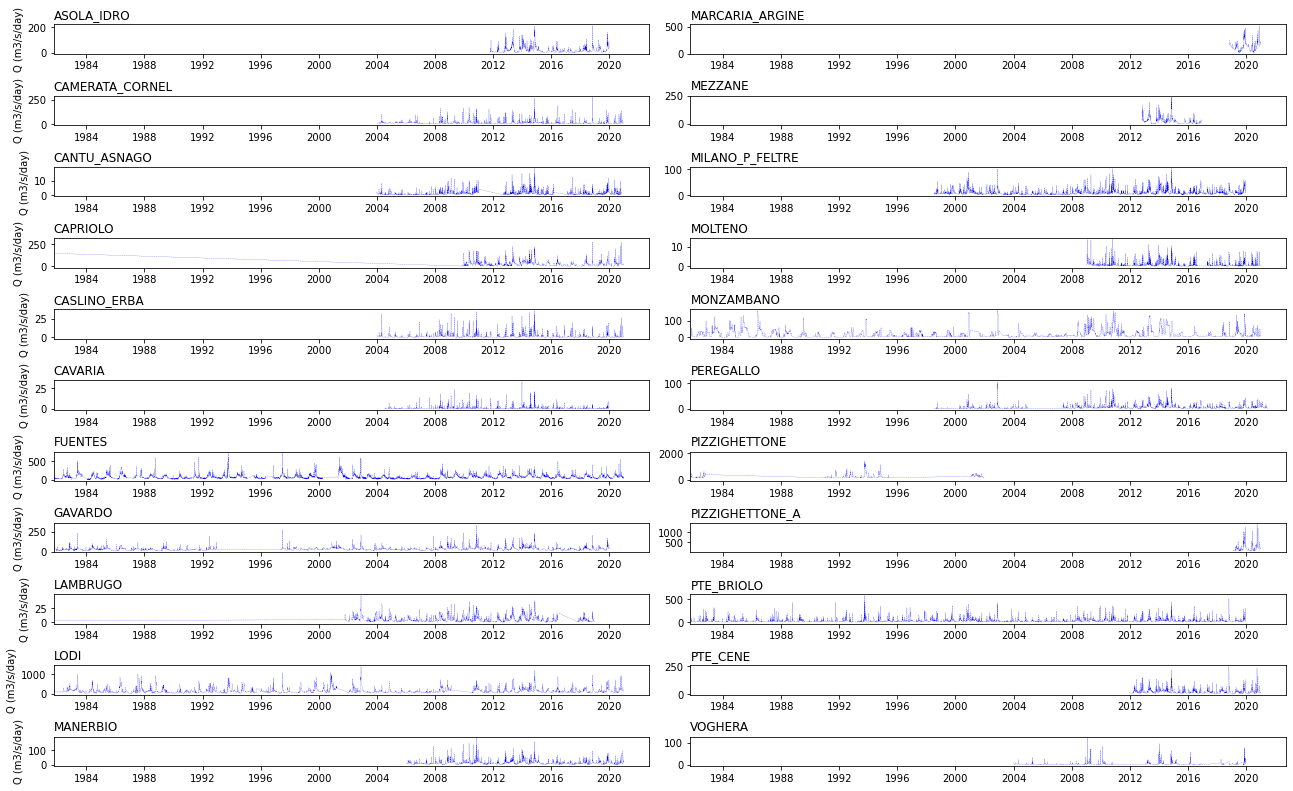

In [40]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 11, numc = 2, datatoplot = timeseries_stations_PDF, 
                                   setylim = False, ymin = 0, ymax = 200, figsizeproj = (18, 11),
                                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  
                                   ylabelplot = "Q (m3/s/day)", 
                                   datestart = datetime.date(1981, 10, 1), dateend = datetime.date(2022, 9, 30),
                                   setnumberofintervals = False, numberintervals = 2,
                                   fontsize_plot = 8)

2. Part 2: Requested data

In [111]:
path =r'IT\original\lombardia\data_received\Discharge data'
filenames = glob.glob(path + "/*.csv")
len(filenames)

26

In [112]:
timeseries_stations = pd.DataFrame(index = pd.date_range('01-01-1998','12-31-2022', freq='D'))

for filename in tqdm.tqdm(filenames):
    # Here we read our dataset:
    time_series_station = pd.read_csv(filename,  sep=",", header=None, encoding='latin-1', 
                                      names=["Code", "Number", "Number_2", "date", "hour", "Q_m3_s", "quality"])
    
    # Change the values in the 'Q_m3_s' column based on the condition of 'quality'
    time_series_station.loc[time_series_station['quality'] >= 149, 'Q_m3_s'] = np.nan
    
    # Now we convert the date column  to "datetime"
    time_series_station.date = pd.to_datetime(time_series_station.date, format='%Y-%m-%d')
    
    # And now we set the index to datetime:
    time_series_station.set_index("date", inplace = True)
    
    # Station name:
    station = time_series_station.iloc[0,0]
    station = station.replace(" ", "")
    
    # Now we put the data together:
    timeseries_stations[str(station)] = time_series_station.Q_m3_s

100%|███████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 71.05it/s]


In [113]:
timeseries_stations

FUENTES     LODI  S_MARIA_LAVELLO  LOMELLO  CAVARIA  MOLTENO  \
1998-01-01      NaN      NaN              NaN      NaN      NaN      NaN   
1998-01-02      NaN      NaN              NaN      NaN      NaN      NaN   
1998-01-03      NaN      NaN              NaN      NaN      NaN      NaN   
1998-01-04      NaN      NaN              NaN      NaN      NaN      NaN   
1998-01-05      NaN      NaN              NaN      NaN      NaN      NaN   
...             ...      ...              ...      ...      ...      ...   
2022-12-27  26.2458  48.8777          79.7348      NaN      NaN      NaN   
2022-12-28  25.2244  48.9746          79.0856      NaN      NaN      NaN   
2022-12-29  42.9968  47.1729          79.0856      NaN      NaN      NaN   
2022-12-30  30.0414  47.1298          75.8009      NaN      NaN      NaN   
2022-12-31  29.0799  43.6494          73.2277      NaN      NaN      NaN   

            CAMERATA_CORNEL  PTE_BRIOLO  GAVARDO  CASLINO_ERBA  ...  CAPRIOLO  \
1998-01-01              NaN         NaN  28.1633           NaN  ...       NaN   
1998-01-02              NaN         NaN  30.1281           NaN  ...       NaN   
1998-01-03              NaN         NaN  44.3006           NaN  ...       NaN   
1998-01-04              NaN         NaN  34.6584           NaN  ...       NaN   
1998-01-05              NaN         NaN  31.4083           NaN  ...       NaN   
...                     ...         ...      ...           ...  ...       ...   
2022-12-27           3.7843     12.7946  13.1487        0.5226  ...    3.8630   
2022-12-28           3.6671     11.8311  12.9318        0.5029  ...    3.8789   
2022-12-29           3.5276     12.1313  12.9015        0.4690  ...    3.8140   
2022-12-30           3.3069     11.8988  13.2330        0.4685  ...    3.6323   
2022-12-31           3.4699     11.0779  12.8100        0.4340  ...    3.7398   

            DARFO  SONCINO  CASTELLANZA  PTE_VEDANO  GRABIASCA  CANTU_ASNAGO  \
1998-01-01    NaN      NaN          NaN         NaN        NaN           NaN   
1998-01-02    NaN      NaN          NaN         NaN        NaN           NaN   
1998-01-03    NaN      NaN          NaN         NaN        NaN           NaN   
1998-01-04    NaN      NaN          NaN         NaN        NaN           NaN   
1998-01-05    NaN      NaN          NaN         NaN        NaN           NaN   
...           ...      ...          ...         ...        ...           ...   
2022-12-27    NaN  18.6632       1.0753         NaN     0.6436           NaN   
2022-12-28    NaN  18.1856       1.0556         NaN     0.6460           NaN   
2022-12-29    NaN  16.7761       1.0224         NaN     0.6471           NaN   
2022-12-30    NaN  11.5077       1.0301         NaN     0.6516           NaN   
2022-12-31    NaN  10.1649       1.0332         NaN     0.6389           NaN   

            VOGHERA  PAVIA_PTETICINO  VIGEVANO  
1998-01-01      NaN              NaN       NaN  
1998-01-02      NaN              NaN       NaN  
1998-01-03      NaN              NaN       NaN  
1998-01-04      NaN              NaN       NaN  
1998-01-05      NaN              NaN       NaN  
...             ...              ...       ...  
2022-12-27      NaN         158.3963  133.2564  
2022-12-28      NaN         156.3343  134.2279  
2022-12-29      NaN         156.2893  133.4607  
2022-12-30      NaN         156.9672  132.5340  
2022-12-31      NaN         154.1025  132.5134  

[9131 rows x 26 columns]

<AxesSubplot:>

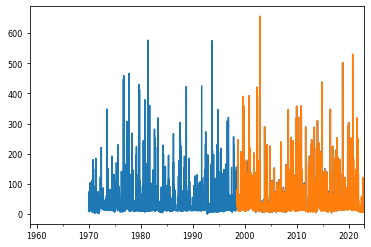

In [114]:
timeseries_stations_PDF.loc[:, "PTE_BRIOLO"].plot()
timeseries_stations.loc[:, "PTE_BRIOLO"].plot()

Comparing the two dataframes:

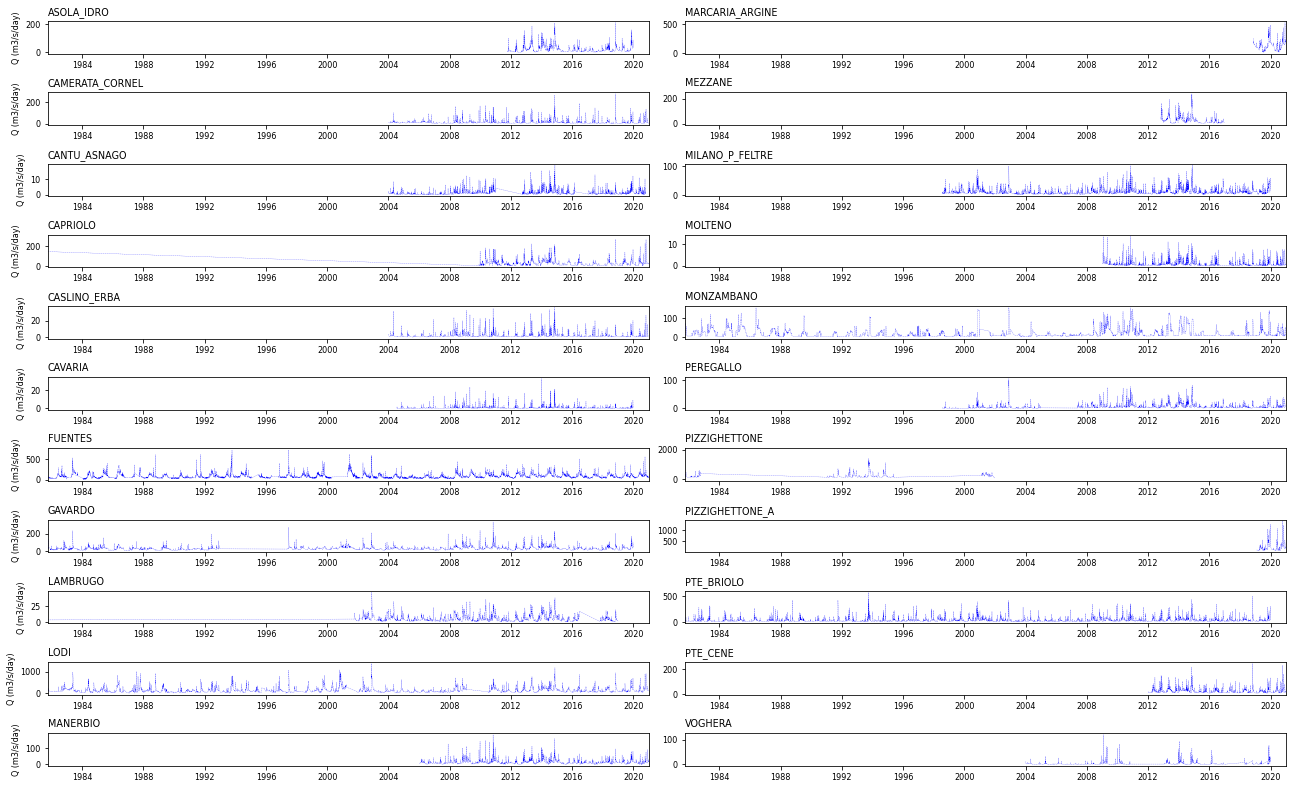

In [56]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 11, numc = 2, datatoplot = timeseries_stations_PDF, 
                                   setylim = False, ymin = 0, ymax = 200, figsizeproj = (18, 11),
                                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  
                                   ylabelplot = "Q (m3/s/day)", 
                                   datestart = datetime.date(1981, 10, 1), dateend = datetime.date(2020, 12, 31),
                                   setnumberofintervals = False, numberintervals = 2,
                                   fontsize_plot = 8)

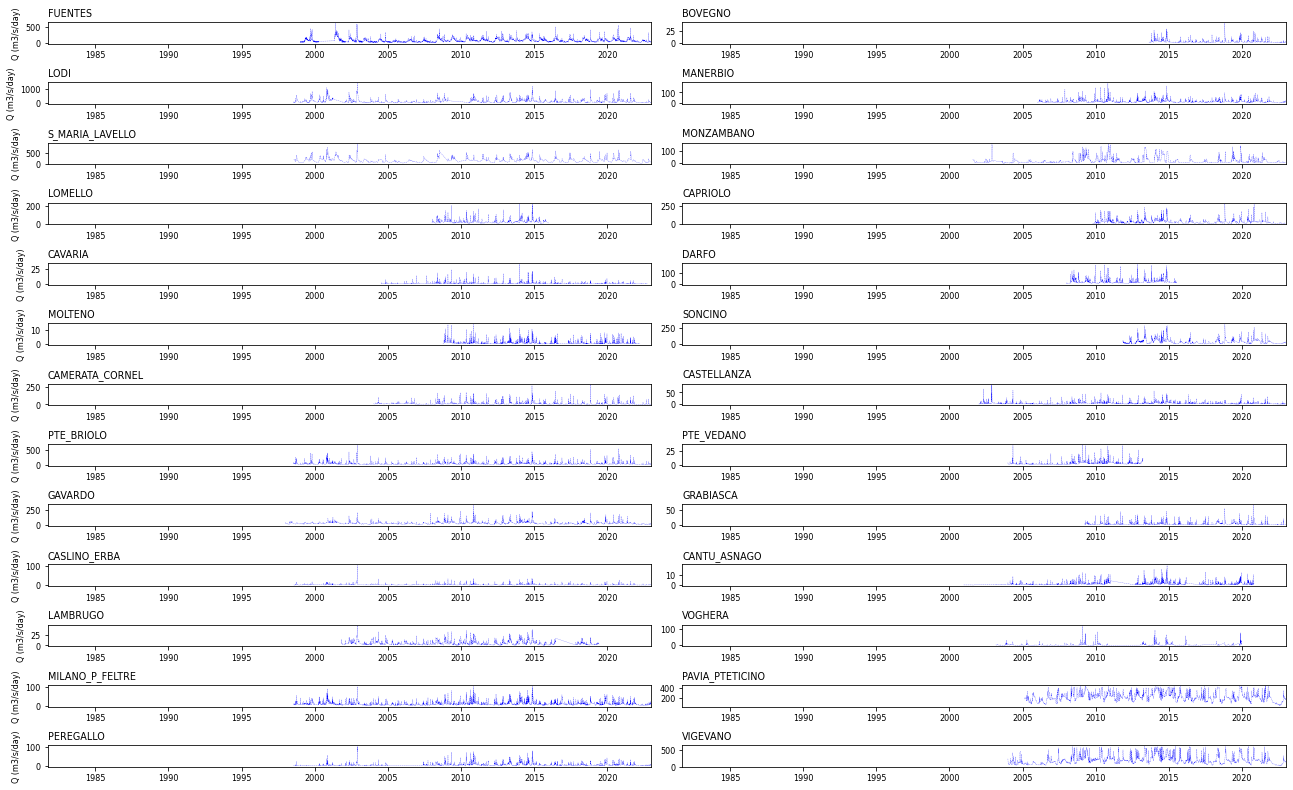

In [115]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 13, numc = 2, datatoplot = timeseries_stations, 
                                   setylim = False, ymin = 0, ymax = 200, figsizeproj = (18, 11),
                                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  
                                   ylabelplot = "Q (m3/s/day)", 
                                   datestart = datetime.date(1981, 10, 1), dateend = datetime.date(2022, 12, 31),
                                   setnumberofintervals = False, numberintervals = 2,
                                   fontsize_plot = 8)

Now we merge the datasets:

In [121]:
# Here we proceed wuth the data concatenation:
timeseries_lombardia = pd.DataFrame(index = pd.date_range('01-01-1970','12-31-2022', freq='D'), columns = stations_unique)


# Now we include the other data from the PDFs(before 2000):
timeseries_lombardia.loc[:"2020", :] = timeseries_stations_PDF.loc[:"2020", :]

# First we set with the data of the unique sets:
timeseries_lombardia.loc["1998":"2022", common_elements_list] = timeseries_stations.loc["1998":"2022", common_elements_list]
timeseries_lombardia.loc["1998":"2022", unique_to_list] = timeseries_stations.loc["1998":"2022", unique_to_list]
timeseries_lombardia.loc[:"2020", unique_to_list_PDF] = timeseries_stations_PDF.loc[:"2020", unique_to_list_PDF]

In [116]:
# Here we get the name of stations in each datafranme:
stations_PDF = timeseries_stations_PDF.columns.tolist()
stations = timeseries_stations.columns.tolist()

# Here we get the unique values in each set of datasets:
unique_to_list_PDF = list(set(stations_PDF) - set(stations))
unique_to_list = list(set(stations) - set(stations_PDF))
common_elements_list = list(set(stations) & set(stations_PDF))

# Here we concatenate the two lists:
stations.extend(stations_PDF)

# Here we get the unique names present in both lists:
stations_unique = list(set(stations))

In [124]:
unique_to_list_PDF

['PIZZIGHETTONE_A',
 'MEZZANE',
 'ASOLA_IDRO',
 'PIZZIGHETTONE',
 'PTE_CENE',
 'MARCARIA_ARGINE']

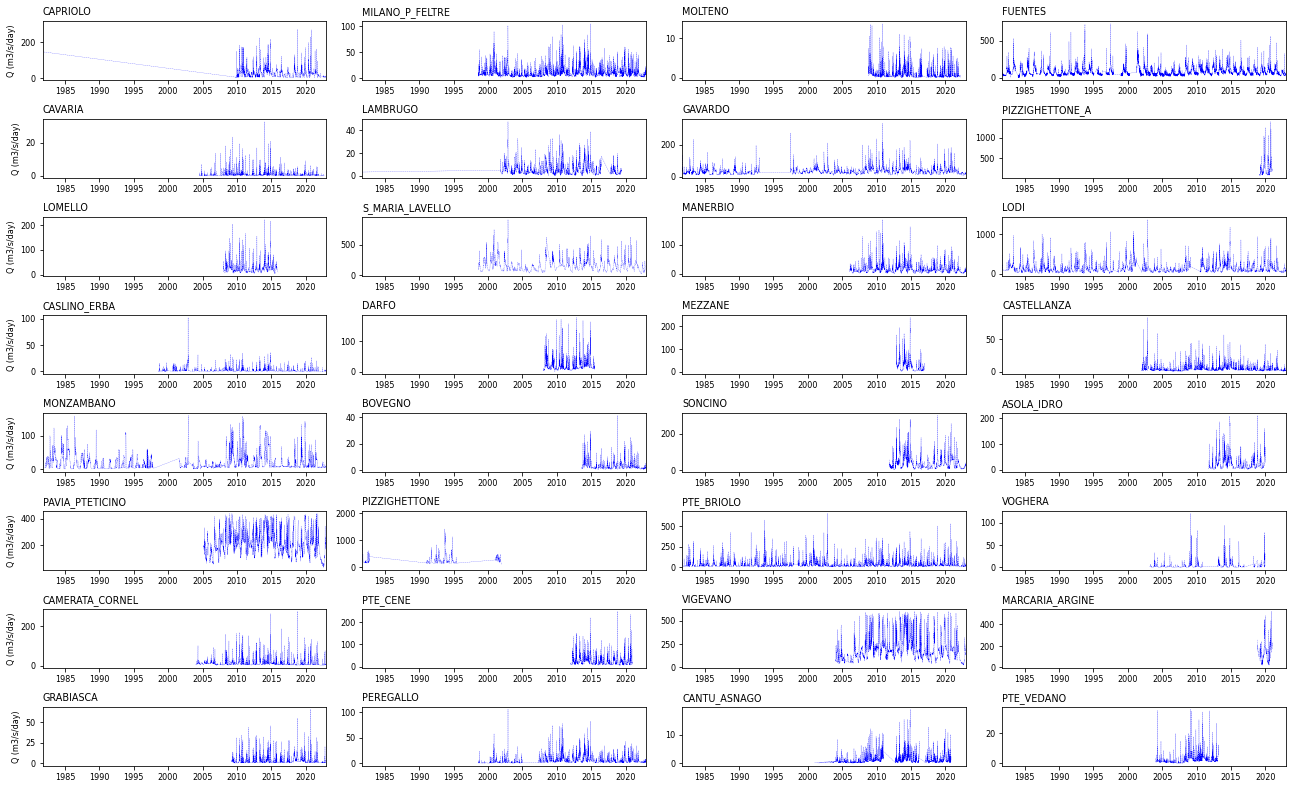

In [118]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 8, numc = 4, datatoplot = timeseries_lombardia, 
                                   setylim = False, ymin = 0, ymax = 200, figsizeproj = (18, 11),
                                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  
                                   ylabelplot = "Q (m3/s/day)", 
                                   datestart = datetime.date(1981, 10, 1), dateend = datetime.date(2022, 12, 31),
                                   setnumberofintervals = False, numberintervals = 2,
                                   fontsize_plot = 8)

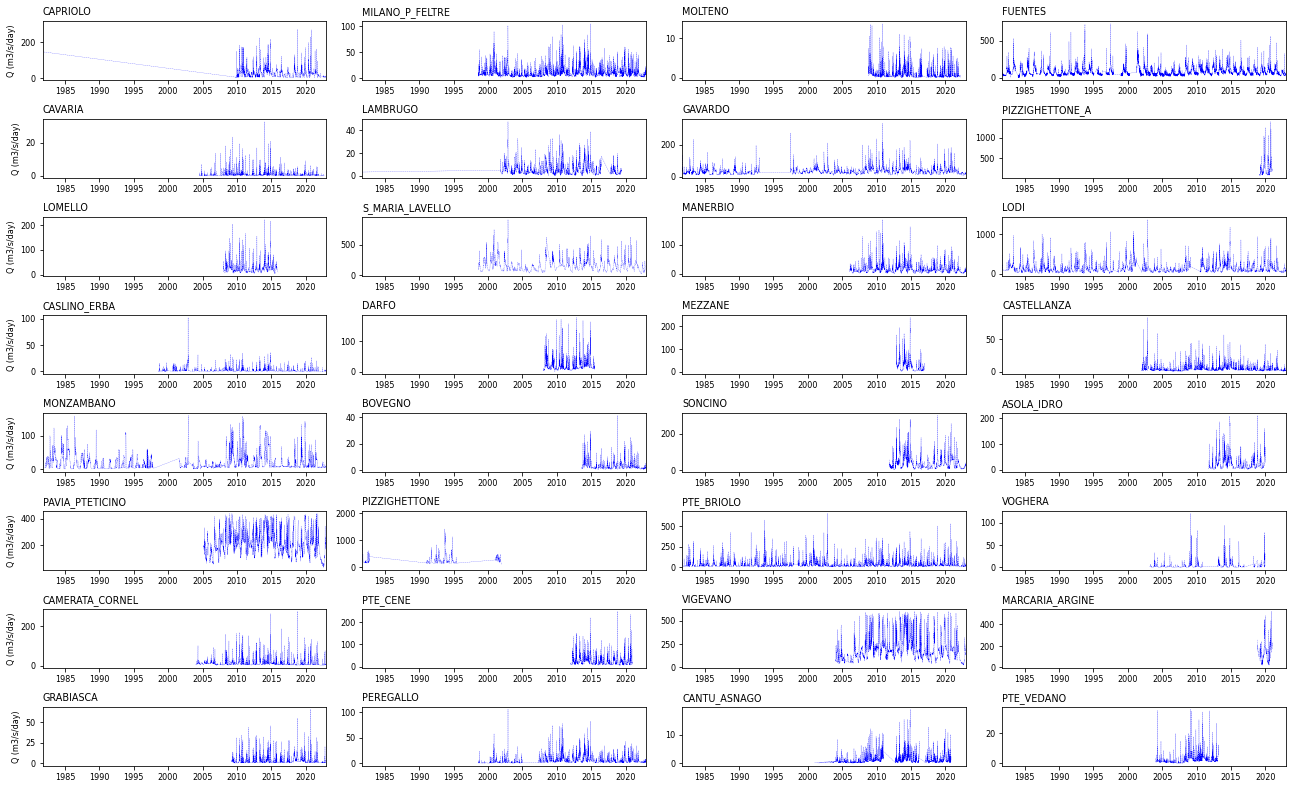

In [122]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 8, numc = 4, datatoplot = timeseries_lombardia, 
                                   setylim = False, ymin = 0, ymax = 200, figsizeproj = (18, 11),
                                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  
                                   ylabelplot = "Q (m3/s/day)", 
                                   datestart = datetime.date(1981, 10, 1), dateend = datetime.date(2022, 12, 31),
                                   setnumberofintervals = False, numberintervals = 2,
                                   fontsize_plot = 8)

In [123]:
timeseries_lombardia.to_excel(r'IT\timeseries\timeseries_lombardia.xlsx') 

In [125]:
# Here we can read the time-series network information:
network_lombardia = pd.read_excel(r"IT\timeseries\network_lombardia.xlsx")

names = ['Code', 'Name', 'Lon', 'Lat']
network_lombardia.columns = names


network_lombardia

Code                                  Name        Lon  \
0           FUENTES                    Gera Lario Fuentes   9.412264   
1              LODI                      Lodi v. X Maggio   9.508685   
2   S_MARIA_LAVELLO              Olginate S.Maria Lavello   9.430142   
3           LOMELLO                        Lomello SS 211   8.799378   
4           CAVARIA     Cavaria con Premezzo v. Cantalupa   8.807691   
5           MOLTENO                      Molteno Cimitero   9.307097   
6        PTE_BRIOLO        Brembate di Sopra Ponte Briolo   9.587380   
7   CAMERATA_CORNEL     Camerata Cornello via Orbrembo 37   9.658458   
8           GAVARDO                        Gavardo SP 116  10.441073   
9         PEREGALLO                       Lesmo Peregallo   9.299103   
10     CASLINO_ERBA          Caslino d'Erba v. 4 novembre   9.232367   
11  MILANO_P_FELTRE                       Milano v.Feltre   9.248738   
12         LAMBRUGO                Costa Masnaga Lambrugo   9.249235   
13          BOVEGNO                  Bovegno ponte Zigole  10.263177   
14         MANERBIO                      Manerbio v.Dante  10.145550   
15       MONZAMBANO           Ponti sul Mincio Monzambano  10.706292   
16            DARFO              Darfo Boario Terme SS 42  10.156518   
17         CAPRIOLO                         Capriolo SP12   9.916121   
18          SONCINO                    Soncino v. Brescia   9.890271   
19       PTE_VEDANO                    Lozza Ponte Vedano   8.868685   
20      CASTELLANZA         Castellanza C.so G. Matteotti   8.907449   
21        GRABIASCA                  Gandellino Grabiasca   9.947876   
22     CANTU_ASNAGO                          Cantù Asnago   9.100367   
23          VOGHERA                   Voghera v. Cambiaso   9.017494   
24         VIGEVANO                        Vigevano SS494   8.879674   
25  PAVIA_PTETICINO                           Pavia SS 35   9.146664   
26    PIZZIGHETTONE  PIZZIGHETTONE ponte Trento e Trieste   9.779270   
27  PIZZIGHETTONE_A                  PIZZIGHETTONE Argine   9.784662   
28       ASOLA_IDRO                     ASOLA v. Carducci  10.407601   
29          MEZZANE                     CALVISANO Mezzane  10.402463   
30  MARCARIA_ARGINE                 MARCARIA Argine Oglio  10.528942   
31         PTE_CENE                            CENE Ponte   9.821873   

          Lat  
0   46.150330  
1   45.319080  
2   45.789438  
3   45.123640  
4   45.689493  
5   45.783012  
6   45.710215  
7   45.898518  
8   45.592356  
9   45.635186  
10  45.835384  
11  45.491633  
12  45.763100  
13  45.781384  
14  45.359745  
15  45.392637  
16  45.870729  
17  45.647800  
18  45.399169  
19  45.775951  
20  45.607178  
21  46.007666  
22  45.718531  
23  44.990282  
24  45.341420  
25  45.180622  
26  45.186348  
27  45.171125  
28  45.220560  
29  45.347634  
30  45.116750  
31  45.784547

#### (h) Liguria:

In [4]:
path =r'IT\original\liguria'
filenames = glob.glob(path + "/*.xlsx")
len(filenames)

4

1. Old time-series (1924-1996):

In [5]:
#Here we read the data:
files_old = pd.read_excel(r'IT\original\liguria\storico_1d.xlsx', skiprows=0)

names = ['Code', 'date', 'Q_m3_s']

files_old.columns = names
files_old.date = files_old.date.astype(str)
files_old.date = files_old.date.str.replace('0000', '', regex = True)

files_old["dates"] = pd.to_datetime(files_old["date"], format='%Y%m%d')
    
files_old

Code      date  Q_m3_s      dates
0       AIRO0  19500101    8.42 1950-01-01
1       AIRO0  19500102    9.20 1950-01-02
2       AIRO0  19500103    8.81 1950-01-03
3       AIRO0  19500104    8.42 1950-01-04
4       AIRO0  19500105    8.42 1950-01-05
...       ...       ...     ...        ...
181326  VAPBL  19431227   26.30 1943-12-27
181327  VAPBL  19431228   19.90 1943-12-28
181328  VAPBL  19431229   20.70 1943-12-29
181329  VAPBL  19431230   16.10 1943-12-30
181330  VAPBL  19431231   14.60 1943-12-31

[181331 rows x 4 columns]

In [6]:
# Here we get the unique stations' names:
stations = files_old["Code"].unique().tolist()
stations

['AIRO0',
 'ARPO0',
 'AULS0',
 'BOLS0',
 'BTOR0',
 'CALA0',
 'CMNT0',
 'ELRA0',
 'EPAN0',
 'GIUS0',
 'ISBO0',
 'LASM0',
 'MERE0',
 'NASC0',
 'NCIS0',
 'SVIG0',
 'VAPBL']

In [7]:
# Here we do a for loop to organize a single data-frame with the entire dataset:
timeseriesfinal = pd.DataFrame(index = pd.date_range(files_old.dates.min(),files_old.dates.max(), freq='D'))


for station in tqdm.tqdm(stations):

        
    timeseries_station = files_old[files_old.Code == station]
    timeseries_station.set_index('dates', inplace = True)

    timeseriesfinal.loc[:, station] = timeseries_station.Q_m3_s

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 86.75it/s]


In [8]:
timeseriesfinal

AIRO0  ARPO0  AULS0  BOLS0  BTOR0  CALA0  CMNT0  ELRA0  EPAN0  \
1924-01-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1924-01-02    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1924-01-03    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1924-01-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1924-01-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1996-12-27    NaN    NaN   18.0   0.74    NaN   89.0   4.18    NaN   31.5   
1996-12-28    NaN    NaN   15.0   0.62    NaN   68.8   3.45    NaN   25.2   
1996-12-29    NaN    NaN   13.1   0.54    NaN   57.2   2.84    NaN   22.2   
1996-12-30    NaN    NaN   11.9   0.65    NaN   53.8   2.45    NaN   20.4   
1996-12-31    NaN    NaN   11.6   0.61    NaN   55.4   2.33    NaN   18.5   

            GIUS0  ISBO0  LASM0  MERE0  NASC0  NCIS0  SVIG0  VAPBL  
1924-01-01    NaN    NaN   1.40    NaN    NaN   1.29    NaN    NaN  
1924-01-02    NaN    NaN   1.40    NaN    NaN   1.17    NaN    NaN  
1924-01-03    NaN    NaN   1.27    NaN    NaN   1.17    NaN    NaN  
1924-01-04    NaN    NaN   9.00    NaN    NaN   1.17    NaN    NaN  
1924-01-05    NaN    NaN   3.40    NaN    NaN   1.06    NaN    NaN  
...           ...    ...    ...    ...    ...    ...    ...    ...  
1996-12-27  12.20    NaN    NaN    NaN   19.1   4.22    NaN    NaN  
1996-12-28   8.58    NaN    NaN    NaN   15.6   3.71    NaN    NaN  
1996-12-29   6.73    NaN    NaN    NaN   12.8   3.22    NaN    NaN  
1996-12-30   6.06    NaN    NaN    NaN   11.8   3.14    NaN    NaN  
1996-12-31   5.96    NaN    NaN    NaN   11.0   2.84    NaN    NaN  

[26664 rows x 17 columns]

2. New dataset:

In [9]:
timeseriesfinal_new = pd.DataFrame(index = pd.date_range("2004","2024", freq='D'))

# Here you get the list of folders:
listdir = os.listdir(r'IT\original\liguria\estrazioni_uradev')
path_i =r'IT\original\liguria\estrazioni_uradev\folder'

i = 0
for folder in tqdm.tqdm(listdir):

    path = path_i.replace('folder', listdir[i])
    filenames = glob.glob(path + "/*.csv")
    
    
    
    timeseries_filename_previous = pd.DataFrame()
    
    for filename in filenames:
        
        timeseries_filename = pd.read_csv(filename, encoding='latin-1', skiprows=0, delimiter = ";")
        timeseries_filename["dates"] = pd.to_datetime(timeseries_filename["Data"], format='%Y-%m-%d')
        timeseries_filename.set_index('dates', inplace = True)
        
        
        timeseries_filenames_complete = pd.concat([timeseries_filename_previous, timeseries_filename])
        timeseries_filename_previous = timeseries_filenames_complete
        
        timeseriesfinal_new.loc[:, listdir[i]] = timeseries_filenames_complete.loc[:, "Q.media"]
        
    i = i + 1

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.00it/s]


In [10]:
timeseriesfinal_new

AIROL  AMERE  BOLSN  CALAM  CAMIN  CARAS  CENGI  CISAN  DCQUA  \
2004-01-01    NaN    NaN   1.38    NaN   3.72    NaN    NaN    NaN    NaN   
2004-01-02    NaN    NaN   1.24    NaN   3.06    NaN    NaN    NaN    NaN   
2004-01-03    NaN    NaN   0.87    NaN   2.35    NaN    NaN    NaN    NaN   
2004-01-04    NaN    NaN   0.82    NaN   1.97    NaN    NaN    NaN    NaN   
2004-01-05    NaN    NaN   0.72    NaN   1.64    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-12-28    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-29    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-30    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-31    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2024-01-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            ELLRA  ...  MONTG  NASCE  PANES  PBATT  POGLI  ROVPT  SMART  \
2004-01-01    NaN  ...    NaN    NaN    NaN    NaN  11.08    NaN    NaN   
2004-01-02    NaN  ...    NaN    NaN    NaN    NaN   9.80    NaN    NaN   
2004-01-03    NaN  ...    NaN    NaN    NaN    NaN   7.76    NaN    NaN   
2004-01-04    NaN  ...    NaN    NaN    NaN    NaN   6.62    NaN    NaN   
2004-01-05    NaN  ...    NaN    NaN    NaN    NaN   5.68    NaN    NaN   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
2023-12-28    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-29    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-30    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-31    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2024-01-01    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            SOLIE  TORRI  VIGNO  
2004-01-01    NaN    NaN    NaN  
2004-01-02    NaN    NaN    NaN  
2004-01-03    NaN    NaN    NaN  
2004-01-04    NaN    NaN    NaN  
2004-01-05    NaN    NaN    NaN  
...           ...    ...    ...  
2023-12-28    NaN    NaN    NaN  
2023-12-29    NaN    NaN    NaN  
2023-12-30    NaN    NaN    NaN  
2023-12-31    NaN    NaN    NaN  
2024-01-01    NaN    NaN    NaN  

[7306 rows x 24 columns]

<AxesSubplot:>

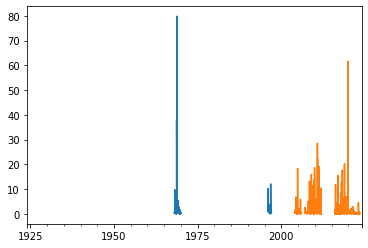

In [14]:
timeseriesfinal.loc[:, "BOLS0"].plot()
timeseriesfinal_new.loc[:, "BOLSN"].plot()

<AxesSubplot:>

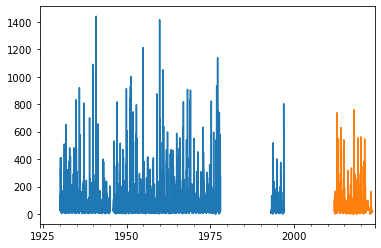

In [15]:
timeseriesfinal.loc[:, "CALA0"].plot()
timeseriesfinal_new.loc[:, "CALAM"].plot()

<AxesSubplot:>

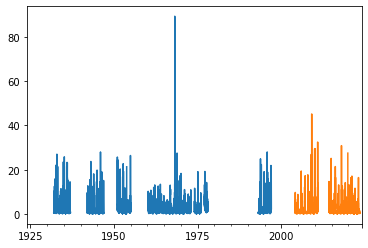

In [16]:
timeseriesfinal.loc[:, "CMNT0"].plot()
timeseriesfinal_new.loc[:, "CAMIN"].plot()

<AxesSubplot:>

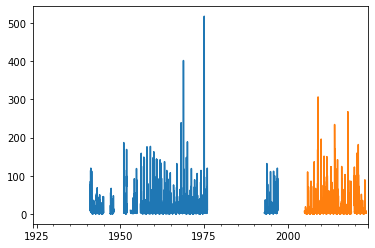

In [19]:
timeseriesfinal.loc[:, "NASC0"].plot()
timeseriesfinal_new.loc[:, "NASCE"].plot()

Usefull new time-series stations:

    * POGLI;
    * NASCE;
    * CAMIN;
    * BOLSN; 

Here we can concatenate some old data to the new from the previously ploted data:

In [33]:
# First we create a dataframe with our data (the new one):
timeseriesfinal_all = pd.DataFrame(index = pd.date_range(files_old.dates.min(), "2024", freq='D'), data = timeseriesfinal_new)

In [36]:
# Here we concatenate the olde data for those three stations:
timeseriesfinal_all.loc["1925":"2000", "CALAM"] = timeseriesfinal.loc[:, "CALA0"]
timeseriesfinal_all.loc["1925":"2000", "CAMIN"] = timeseriesfinal.loc[:, "CMNT0"]
timeseriesfinal_all.loc["1925":"2000", "NASCE"] = timeseriesfinal.loc[:, "NASC0"]

In [40]:
# At this part we copy the time-series data into a specific dataframe:
timeseries_liguria = timeseriesfinal_all.loc["1950":"2024", :].copy()
timeseries_liguria

AIROL  AMERE  BOLSN  CALAM  CAMIN  CARAS  CENGI  CISAN  DCQUA  \
1950-01-01    NaN    NaN    NaN   22.3    NaN    NaN    NaN    NaN    NaN   
1950-01-02    NaN    NaN    NaN   24.0    NaN    NaN    NaN    NaN    NaN   
1950-01-03    NaN    NaN    NaN   24.8    NaN    NaN    NaN    NaN    NaN   
1950-01-04    NaN    NaN    NaN   24.0    NaN    NaN    NaN    NaN    NaN   
1950-01-05    NaN    NaN    NaN   24.0    NaN    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-12-28    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-29    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-30    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-31    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2024-01-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            ELLRA  ...  MONTG  NASCE  PANES  PBATT  POGLI  ROVPT  SMART  \
1950-01-01    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1950-01-02    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1950-01-03    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1950-01-04    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1950-01-05    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
2023-12-28    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-29    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-30    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2023-12-31    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2024-01-01    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            SOLIE  TORRI  VIGNO  
1950-01-01    NaN    NaN    NaN  
1950-01-02    NaN    NaN    NaN  
1950-01-03    NaN    NaN    NaN  
1950-01-04    NaN    NaN    NaN  
1950-01-05    NaN    NaN    NaN  
...           ...    ...    ...  
2023-12-28    NaN    NaN    NaN  
2023-12-29    NaN    NaN    NaN  
2023-12-30    NaN    NaN    NaN  
2023-12-31    NaN    NaN    NaN  
2024-01-01    NaN    NaN    NaN  

[27029 rows x 24 columns]

In [44]:
# Here we can read the time-series network information:
network_liguria = pd.read_excel(r"IT\original\liguria\network_liguria.xlsx", usecols = ["CODICE STAZIONE", "NOME STAZIONE", 
                                                                                        "LONG (WGS84)", "LAT (WGS84)", 
                                                                                        "AREA SOTTESA [km2]"])

names = ['Code', 'Name', 'Lon', 'Lat', 'Area']
network_liguria.columns = names


network_liguria

Code                     Name       Lon       Lat  Area
0   AIROL                   AIROLE   7.54484  43.87296   478
1   AMERE                  MERELLI   7.84759  43.88137    34
2   BOLSN                  BOLSINE   8.57322  44.37234    26
3   CALAM                CALAMAZZA   9.95015  44.19802   939
4   CAMIN                 CAMINATA   9.41003  44.34006    41
5   CARAS                  CARASCO   9.34825  44.34615   295
6   CENGI                   CENGIO   8.20417  44.38987   223
7   CISAN          CISANO SUL NEVA   8.14573  44.08552   124
8   DCQUA   DOLCEACQUA – MOLINETTI   7.62381  43.86041   165
9   ELLRA     ELLERA – PONTE POGGI   8.46609  44.36676   202
10  FERRA                 FERRANIA   8.32248  44.36694    55
11  GEPTX     GENOVA - PONTEDECIMO   8.90010  44.48852    61
12  ISBON                ISOLABONA   7.63762  43.87765    15
13  MAGSG  PONTREMOLI - S.GIUSTINA   9.89656  44.36182   203
14  MONTG                MONTOGGIO   9.04769  44.51561    59
15  NASCE                  NASCETO   9.65595  44.27808   130
16  PANES                   PANESI   9.35624  44.34209   206
17  PBATT   PIANA BATTOLLA - PONTE   9.84904  44.19801   364
18  POGLI        POGLI DI ORTOVERO   8.06393  44.05445    87
19  ROVPT                  ROVEGNO   9.28156  44.56529   129
20  SMART              SAN MARTINO   9.34033  44.36047   161
21  SOLIE                  SOLIERA  10.06207  44.20233   208
22  TORRI                    TORRI   7.55401  43.83782   155
23  VIGNO                  VIGNOLO   9.37385  44.38154   102

In [45]:
#timeseries_liguria.to_excel(r'IT\timeseries\timeseries_liguria.xlsx') 
#network_liguria.to_excel(r'IT\timeseries\network_liguria.xlsx') 

#### (i) Toscana:

#### Part 1: Data download

First you can use an API to download all the available data:

Here you read a network information to read all available code names:

In [72]:
# Here we can read the time-series network information:
network_toscana = pd.read_excel(r"IT\original\toscana\network_toscana.xlsx")
network_toscana

IDStazione  StazioneExtra                        Nome         Comune  \
0    TOS03004563              0                       Ambra         Bucine   
1    TOS13000009              0           Ansedonia interna      Orbetello   
2    TOS09000016              0  Aulella a Frescara (Aulla)      Fivizzano   
3    TOS01004007              0                      Avenza        Carrara   
4    TOS09001000              0                   Baccatoio    Pietrasanta   
..           ...            ...                         ...            ...   
278  TOS02004365              0                   Vecchiano      Vecchiano   
279  TOS20000002              0                 Vecchiano Q      Vecchiano   
280  TOS02004091              0                 Viareggio 1      Viareggio   
281  TOS02004101              0                 Viareggio 2      Viareggio   
282  TOS05000016              0                      Vincio  Cerreto Guidi   

    Provincia              Fiume  Strumento Unita' Misura  IDSensoreRete  \
0          AR              Ambra  idrometro             m       747509.0   
1          GR                NaN  idrometro             m        70045.0   
2          MS                NaN  idrometro             m            NaN   
3          MS           Carrione  idrometro             m       731359.0   
4          LU          Baccatoio  idrometro             m       730909.0   
..        ...                ...        ...           ...            ...   
278        PI            Serchio  idrometro             m       730459.0   
279        PI            Serchio  idrometro             m       734759.0   
280        LU  Canale Burlamacca  idrometro             m       730709.0   
281        LU  Canale Burlamacca  idrometro             m       730759.0   
282        FI                NaN  idrometro             m            NaN   

      LAT [Â°]   LON [Â°]    GB E [m]    GB N [m]  Quota  QuotaTerra  \
0    43.415123  11.605106  1710936.89  4810227.49    NaN         NaN   
1    42.435620  11.189575  1680127.27  4700482.90    NaN         NaN   
2    44.200802  10.033386  1582600.90  4894710.82    NaN         NaN   
3    44.045158  10.060126  1584960.23  4877450.56  15.00         NaN   
4    43.924023  10.226933  1598523.93  4864181.76   2.00         NaN   
..         ...        ...         ...         ...    ...         ...   
278  43.780514  10.398887  1612597.53  4848462.20   6.00         NaN   
279  43.782400  10.399718  1612660.90  4848672.82   0.27         NaN   
280  43.867668  10.259482  1601232.22  4857961.94   0.00         NaN   
281  43.867316  10.258513  1601155.01  4857921.66    NaN         NaN   
282  43.781999  10.842441  1648286.90  4849325.82    NaN         NaN   

     Zero Idrometrico [m]  
0                  239.98  
1                     NaN  
2                     NaN  
3                    6.27  
4                   -0.41  
..                    ...  
278                 -1.10  
279                   NaN  
280                 -0.27  
281                 -0.33  
282                   NaN  

[283 rows x 16 columns]

Here we can download all the portata data using a loop and selenium:

In [10]:
from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
#import pandas as pd
#import html5lib

#from selenium.webdriver.support.ui import WebDriverWait
#from selenium.webdriver.common.by import By
#from selenium.webdriver.support import expected_conditions as EC

In [11]:
# For the loop we just need to change the last part of the URL (CODE):
URL_original = "https://www.sir.toscana.it/archivio/download.php?IDST=idro_p&IDS=CODE"

driver = webdriver.Chrome()
for station in tqdm.tqdm(network_toscana.IDStazione.tolist()):
    
    URL_final = URL_original.replace("CODE", str(station))
    driver.get(URL_final)

100%|████████████████████████████████████████████████████████████████████████████████| 283/283 [18:48<00:00,  3.99s/it]


#### Part 2: Data organization:

The files too small were deleted since they correspond to stations without streamflow data.

In [14]:
path =r'IT\original\toscana\storic'
filenames = glob.glob(path + "/*.csv")
len(filenames)

78

In [38]:
timeseriesfinal = pd.DataFrame(index = pd.date_range('09-01-1950','09-30-2023', freq='D'))

i = 0
for filename in tqdm.tqdm(filenames):
    
        
    timeseries_station = pd.read_csv(filename, encoding='latin-1', skiprows=19, delimiter = ";", 
                             names = ["dates", "Q_m3_s", "Val"], decimal=',')

    timeseries_station["dates"] = pd.to_datetime(timeseries_station["dates"], format='%d/%m/%Y')
    timeseries_station.set_index("dates", inplace = True)
    
    station = pd.read_csv(filename, encoding='latin-1', skiprows=0, delimiter = ";", nrows = 1)
    station = station.iloc[:, 1]
    
    timeseries_station = timeseries_station.resample('D').mean()
    timeseriesfinal.loc[:, station[0]] = timeseries_station.Q_m3_s
    
    i = i + 1

100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [00:01<00:00, 40.09it/s]


<AxesSubplot:>

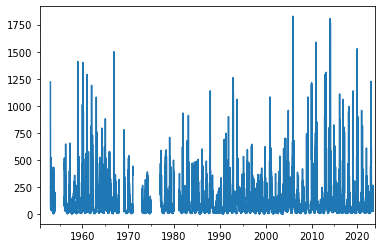

In [41]:
timeseriesfinal.iloc[:,33].plot()

In [44]:
# At this part we copy the time-series data into a specific dataframe:
timeseries_toscana = timeseriesfinal.copy()
timeseries_toscana

TOS01004379  TOS01004411  TOS01004521  TOS01004568  TOS01004571  \
1950-09-01          NaN          NaN          NaN          NaN          NaN   
1950-09-02          NaN          NaN          NaN          NaN          NaN   
1950-09-03          NaN          NaN          NaN          NaN          NaN   
1950-09-04          NaN          NaN          NaN          NaN          NaN   
1950-09-05          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2023-09-26          NaN          NaN          NaN          NaN          NaN   
2023-09-27          NaN          NaN          NaN          NaN          NaN   
2023-09-28          NaN          NaN          NaN          NaN          NaN   
2023-09-29          NaN          NaN          NaN          NaN          NaN   
2023-09-30          NaN          NaN          NaN          NaN          NaN   

            TOS01004591  TOS01004611  TOS01004621  TOS01004623  TOS01004625  \
1950-09-01          NaN          NaN          NaN          NaN          NaN   
1950-09-02          NaN          NaN          NaN          NaN          NaN   
1950-09-03          NaN          NaN          NaN          NaN          NaN   
1950-09-04          NaN          NaN          NaN          NaN          NaN   
1950-09-05          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2023-09-26          NaN          NaN          NaN          NaN          NaN   
2023-09-27          NaN          NaN          NaN          NaN          NaN   
2023-09-28          NaN          NaN          NaN          NaN          NaN   
2023-09-29          NaN          NaN          NaN          NaN          NaN   
2023-09-30          NaN          NaN          NaN          NaN          NaN   

            ...  TOS10004910  TOS10005050  TOS10005190  TOS10005270  \
1950-09-01  ...          NaN          NaN          NaN          NaN   
1950-09-02  ...          NaN          NaN          NaN          NaN   
1950-09-03  ...          NaN          NaN          NaN          NaN   
1950-09-04  ...          NaN          NaN          NaN          NaN   
1950-09-05  ...          NaN          NaN          NaN          NaN   
...         ...          ...          ...          ...          ...   
2023-09-26  ...          NaN          NaN          NaN          NaN   
2023-09-27  ...          NaN          NaN          NaN          NaN   
2023-09-28  ...          NaN          NaN          NaN          NaN   
2023-09-29  ...          NaN          NaN          NaN          NaN   
2023-09-30  ...          NaN          NaN          NaN          NaN   

            TOS10005480  TOS10005700  TOS10005710  TOS10005720  TOS10005760  \
1950-09-01          NaN          NaN          NaN          NaN          NaN   
1950-09-02          NaN          NaN          NaN          NaN          NaN   
1950-09-03          NaN          NaN          NaN          NaN          NaN   
1950-09-04          NaN          NaN          NaN          NaN          NaN   
1950-09-05          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2023-09-26          NaN          NaN          NaN          NaN          NaN   
2023-09-27          NaN          NaN          NaN          NaN          NaN   
2023-09-28          NaN          NaN          NaN          NaN          NaN   
2023-09-29          NaN          NaN          NaN          NaN          NaN   
2023-09-30          NaN          NaN          NaN          NaN          NaN   

            TOS10005950  
1950-09-01          NaN  
1950-09-02          NaN  
1950-09-03          NaN  
1950-09-04          NaN  
1950-09-05          NaN  
...                 ...  
2023-09-26          NaN  
2023-09-27          NaN  
2023-09-28          NaN  
2023-09-29          NaN  
2023-09-30          NaN  


In [73]:
# Here we save our network Toscana but only the stations that we are working with at the end:
network_toscana_aux = network_toscana.copy()
network_toscana_aux.set_index("IDStazione", inplace = True)
network_toscana_aux = network_toscana_aux.loc[timeseries_toscana.columns, ["Nome", "LAT [Â°]", "LON [Â°]"]]
network_toscana = network_toscana_aux.copy()

network_toscana.reset_index(inplace = True)
network_toscana.columns = ["Code", "Name", "Lat", "Lon"]

In [74]:
network_toscana

Code                    Name        Lat        Lon
0   TOS01004379                    Stia  43.800511  11.705702
1   TOS01004411                Subbiano  43.571680  11.867846
2   TOS01004521  Ponte Ferrovia FI-Roma  43.466859  11.824400
3   TOS01004568                  Bucine  43.483529  11.618680
4   TOS01004571             Montevarchi  43.541212  11.566208
..          ...                     ...        ...        ...
73  TOS10005700           Casamallecchi  43.000000  11.000000
74  TOS10005710                  Ornate  43.000000  11.000000
75  TOS10005720      Ponte di Torniella  43.073982  11.154131
76  TOS10005760      Monte Amiata Scalo  43.069893  11.392822
77  TOS10005950            S. Mamiliano  42.750384  10.234461

[78 rows x 4 columns]

In [75]:
timeseries_toscana.to_excel(r'IT\timeseries\timeseries_toscana.xlsx') 
network_toscana.to_excel(r'IT\timeseries\network_toscana.xlsx')







#### 2. Data organization:

At this part the concatenation of all the time series is made, and the main objective is to have a final dataframe with all the daily streamflow information together. 

* Time series organization:

Here we read the time-series dataframes:

In [126]:
timeseries_emilia = pd.read_excel(r"IT\timeseries\timeseries_emilia.xlsx", index_col=0)
timeseries_emilia.index = pd.to_datetime(timeseries_emilia.index)

timeseries_lombardia = pd.read_excel(r"IT\timeseries\timeseries_lombardia.xlsx", index_col=0)
timeseries_lombardia.index = pd.to_datetime(timeseries_lombardia.index)

timeseries_piemonte = pd.read_csv(r"IT\timeseries\timeseries_piemonte.csv", encoding='latin-1', index_col=0)
timeseries_piemonte.index = pd.to_datetime(timeseries_piemonte.index)

timeseries_sardegna = pd.read_csv(r"IT\timeseries\timeseries_sardegna.csv", encoding='latin-1', index_col=0)
timeseries_sardegna.index = pd.to_datetime(timeseries_sardegna.index)

timeseries_trento = pd.read_excel(r"IT\timeseries\timeseries_trento.xlsx", index_col=0)
timeseries_trento.index = pd.to_datetime(timeseries_trento.index)

timeseries_umbria = pd.read_csv(r"IT\timeseries\timeseries_umbria.csv", index_col=0)
timeseries_umbria.index = pd.to_datetime(timeseries_umbria.index)

timeseries_valedaosta = pd.read_excel(r"IT\timeseries\timeseries_valedaosta.xlsx", index_col=0)
timeseries_valedaosta.index = pd.to_datetime(timeseries_valedaosta.index)

timeseries_liguria = pd.read_excel(r"IT\timeseries\timeseries_liguria.xlsx", index_col=0)
timeseries_liguria.index = pd.to_datetime(timeseries_liguria.index)

timeseries_toscana = pd.read_excel(r"IT\timeseries\timeseries_toscana.xlsx", index_col=0)
timeseries_toscana.index = pd.to_datetime(timeseries_toscana.index)

Here we read the network information dataframes:

In [127]:
network_emilia = pd.read_excel(r"IT\timeseries\network_emilia.xlsx")
network_emilia.Code = network_emilia.Code.astype(str)
network_emilia["region"] = "emilia"

network_lombardia = pd.read_excel(r"IT\timeseries\network_lombardia.xlsx")
network_lombardia.Code = network_lombardia.Code.astype(str)
network_lombardia["region"] = "lombardia"

network_piemonte = pd.read_excel(r"IT\timeseries\network_piemonte.xlsx")
network_piemonte.Code = network_piemonte.Code.astype(str)
network_piemonte["region"] = "piemonte"

network_sardegna = pd.read_excel(r"IT\timeseries\network_sardegna.xlsx")
network_sardegna.Code = network_sardegna.Code.astype(str)
network_sardegna["region"] = "sardegna"

network_trento = pd.read_excel(r"IT\timeseries\network_trento.xlsx")
network_trento.Code = network_trento.Code.astype(str)
network_trento["region"] = "trento"

network_umbria = pd.read_excel(r"IT\timeseries\network_umbria.xlsx")
network_umbria.Code = network_umbria.Code.astype(str)
network_umbria["region"] = "umbria"

network_valedaosta = pd.read_excel(r"IT\timeseries\network_valedaosta.xlsx")
network_valedaosta.Code = network_valedaosta.Code.astype(str)
network_valedaosta["region"] = "valedaosta"

network_liguria = pd.read_excel(r"IT\timeseries\network_liguria.xlsx")
network_liguria.Code = network_liguria.Code.astype(str)
network_liguria["region"] = "liguria"

network_toscana = pd.read_excel(r"IT\timeseries\network_toscana.xlsx")
network_toscana.Code = network_toscana.Code.astype(str)
network_toscana["region"] = "toscana"

Now we create a single dataframe for all Italy:

In [128]:
# Now we create a dataframe where we can insert the information, and then we concatenate the data:
timeseries_IT = pd.DataFrame(index = pd.date_range('09-01-1958','12-31-2022', freq='D'))

timeseries_IT[timeseries_emilia.columns] = timeseries_emilia
timeseries_IT[timeseries_lombardia.columns] = timeseries_lombardia
timeseries_IT[timeseries_piemonte.columns] = timeseries_piemonte
timeseries_IT[timeseries_sardegna.columns] = timeseries_sardegna
timeseries_IT[timeseries_trento.columns] = timeseries_trento
timeseries_IT[timeseries_umbria.columns] = timeseries_umbria
timeseries_IT[timeseries_valedaosta.columns] = timeseries_valedaosta
timeseries_IT[timeseries_liguria.columns] = timeseries_liguria
timeseries_IT[timeseries_toscana.columns] = timeseries_toscana

In [129]:
timeseries_IT

Cardinala Idice  Castenaso  Cadelbosco  Polesella  \
1958-09-01              NaN        NaN         NaN        NaN   
1958-09-02              NaN        NaN         NaN        NaN   
1958-09-03              NaN        NaN         NaN        NaN   
1958-09-04              NaN        NaN         NaN        NaN   
1958-09-05              NaN        NaN         NaN        NaN   
...                     ...        ...         ...        ...   
2022-12-27              NaN        NaN         NaN        NaN   
2022-12-28              NaN        NaN         NaN        NaN   
2022-12-29              NaN        NaN         NaN        NaN   
2022-12-30              NaN        NaN         NaN        NaN   
2022-12-31              NaN        NaN         NaN        NaN   

            Berceto Baganza  Fiumalbo  Morciano di Romagna  Castelbolognese  \
1958-09-01              NaN       NaN                  NaN              NaN   
1958-09-02              NaN       NaN                  NaN              NaN   
1958-09-03              NaN       NaN                  NaN              NaN   
1958-09-04              NaN       NaN                  NaN              NaN   
1958-09-05              NaN       NaN                  NaN              NaN   
...                     ...       ...                  ...              ...   
2022-12-27              NaN       NaN                  NaN              NaN   
2022-12-28              NaN       NaN                  NaN              NaN   
2022-12-29              NaN       NaN                  NaN              NaN   
2022-12-30              NaN       NaN                  NaN              NaN   
2022-12-31              NaN       NaN                  NaN              NaN   

            Pracchia  Case Bonini  ...  TOS10004910  TOS10005050  TOS10005190  \
1958-09-01       NaN          NaN  ...          NaN          NaN         5.50   
1958-09-02       NaN          NaN  ...          NaN          NaN         5.20   
1958-09-03       NaN          NaN  ...          NaN          NaN         5.38   
1958-09-04       NaN          NaN  ...          NaN          NaN         5.50   
1958-09-05       NaN          NaN  ...          NaN          NaN         5.20   
...              ...          ...  ...          ...          ...          ...   
2022-12-27       NaN          NaN  ...          NaN          NaN          NaN   
2022-12-28       NaN          NaN  ...          NaN          NaN          NaN   
2022-12-29       NaN          NaN  ...          NaN          NaN          NaN   
2022-12-30       NaN          NaN  ...          NaN          NaN          NaN   
2022-12-31       NaN          NaN  ...          NaN          NaN          NaN   

            TOS10005270  TOS10005480  TOS10005700  TOS10005710  TOS10005720  \
1958-09-01          NaN          NaN          NaN          NaN          NaN   
1958-09-02          NaN          NaN          NaN          NaN          NaN   
1958-09-03          NaN          NaN          NaN          NaN          NaN   
1958-09-04          NaN          NaN          NaN          NaN          NaN   
1958-09-05          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2022-12-27          NaN          NaN          NaN          NaN          NaN   
2022-12-28          NaN          NaN          NaN          NaN          NaN   
2022-12-29          NaN          NaN          NaN          NaN          NaN   
2022-12-30          NaN          NaN          NaN          NaN          NaN   
2022-12-31          NaN          NaN          NaN          NaN          NaN   

            TOS10005760  TOS10005950  
1958-09-01         0.04          NaN  
1958-09-02         0.04          NaN  
1958-09-03         0.04          NaN  
1958-09-04         0.03          NaN  
1958-09-05         0.02          NaN  
...                 ...          ...  
2022-12-27          NaN          NaN  
2022-12-28          NaN          NaN  
2022-12-2

* Network organization:

In [130]:
network_IT = pd.DataFrame()
network_IT = network_IT.append(network_emilia, ignore_index=True)
network_IT = network_IT.append(network_lombardia, ignore_index=True)
network_IT = network_IT.append(network_piemonte, ignore_index=True)
network_IT = network_IT.append(network_sardegna, ignore_index=True)
network_IT = network_IT.append(network_trento, ignore_index=True)
network_IT = network_IT.append(network_umbria, ignore_index=True)
network_IT = network_IT.append(network_valedaosta, ignore_index=True)
network_IT = network_IT.append(network_liguria, ignore_index=True)
network_IT = network_IT.append(network_toscana, ignore_index=True)

network_IT

Code                Name     xcoord     ycoord   region Type  \
0    Cardinala Idice               IDICE  11.801844  44.578911   emilia  NaN   
1          Castenaso               IDICE  11.470171  44.507477   emilia  NaN   
2         Cadelbosco            CROSTOLO  10.581190  44.778796   emilia  NaN   
3          Polesella                  PO  11.756259  44.959259   emilia  NaN   
4    Berceto Baganza               PARMA   9.993069  44.503582   emilia  NaN   
..               ...                 ...        ...        ...      ...  ...   
412      TOS10005700       Casamallecchi  11.000000  43.000000  toscana  NaN   
413      TOS10005710              Ornate  11.000000  43.000000  toscana  NaN   
414      TOS10005720  Ponte di Torniella  11.154131  43.073982  toscana  NaN   
415      TOS10005760  Monte Amiata Scalo  11.392822  43.069893  toscana  NaN   
416      TOS10005950        S. Mamiliano  10.234461  42.750384  toscana  NaN   

     Area  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
..    ...  
412   NaN  
413   NaN  
414   NaN  
415   NaN  
416   NaN  

[417 rows x 7 columns]

In [131]:
network_IT.drop(["Type", "Area"], axis = 1, inplace = True)
names = ['Code', 'Name', 'xcoord', 'ycoord', 'region']
network_IT.columns = names


coords = network_IT[["xcoord", "ycoord", "Code", 'region']]
coords.set_index('Code', inplace = True)

coords.xcoord.astype(float)
coords.ycoord.astype(float)

coords

xcoord     ycoord   region
Code                                          
Cardinala Idice  11.801844  44.578911   emilia
Castenaso        11.470171  44.507477   emilia
Cadelbosco       10.581190  44.778796   emilia
Polesella        11.756259  44.959259   emilia
Berceto Baganza   9.993069  44.503582   emilia
...                    ...        ...      ...
TOS10005700      11.000000  43.000000  toscana
TOS10005710      11.000000  43.000000  toscana
TOS10005720      11.154131  43.073982  toscana
TOS10005760      11.392822  43.069893  toscana
TOS10005950      10.234461  42.750384  toscana

[417 rows x 3 columns]

Here we save our data:

In [140]:
network_IT.to_excel(r'IT\timeseries\network_IT.xlsx') 
timeseries_IT.to_excel(r'IT\timeseries\timeseries_IT.xlsx')

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

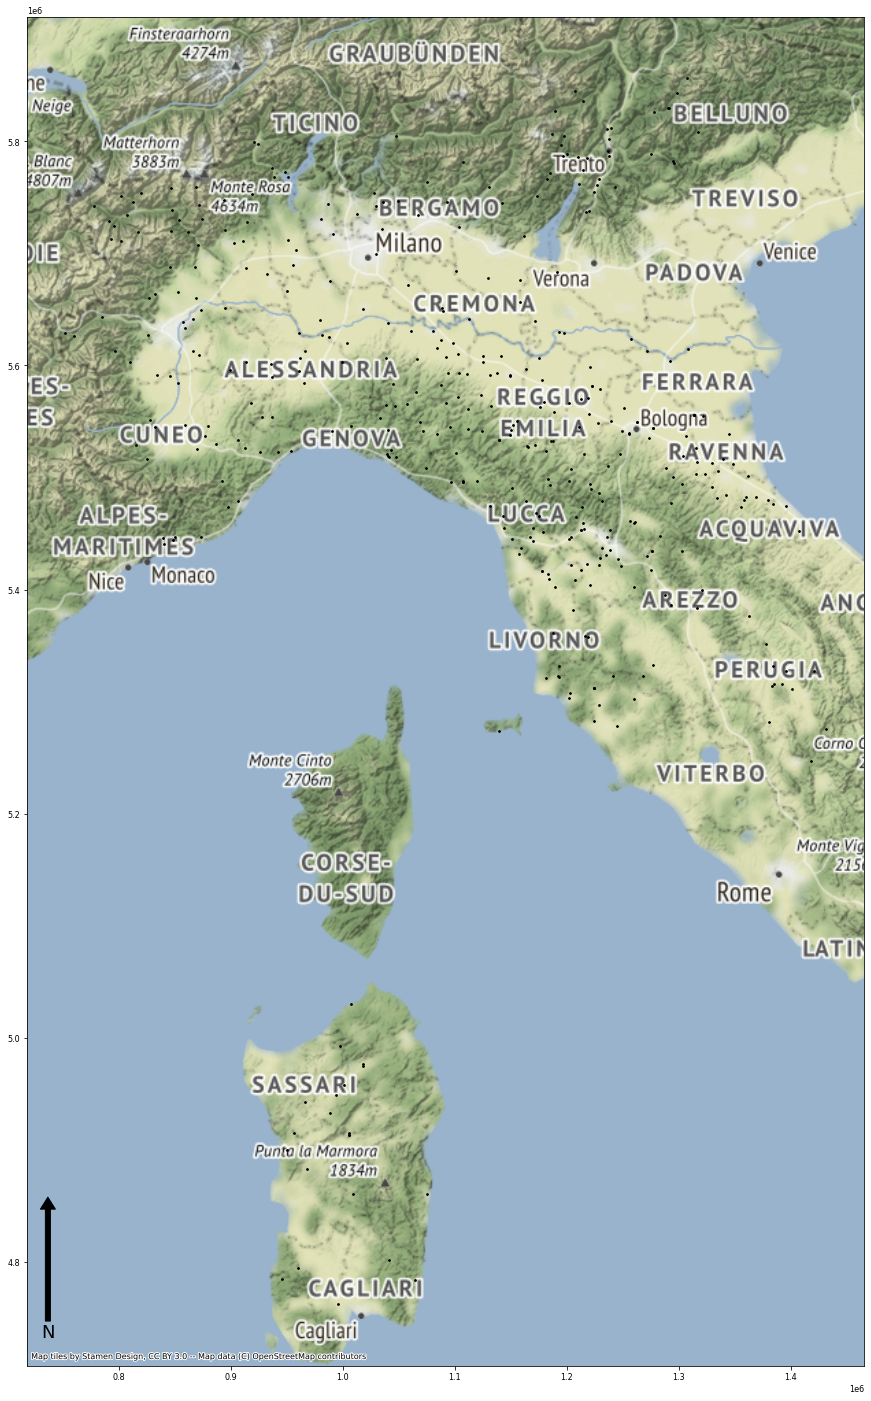

In [132]:
geospatialfunctions.plotpointsmap(coords)

In [133]:
coords["region"]

Code
Cardinala Idice     emilia
Castenaso           emilia
Cadelbosco          emilia
Polesella           emilia
Berceto Baganza     emilia
                    ...   
TOS10005700        toscana
TOS10005710        toscana
TOS10005720        toscana
TOS10005760        toscana
TOS10005950        toscana
Name: region, Length: 417, dtype: object

In [134]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_IT.loc["1981":"2018",:], coords)
summarygapsstations["region"] = coords["region"]
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps   region
Code                                                                   
Cardinala Idice  11.801844  44.578911  13514.0       97.370128   emilia
Castenaso        11.470171  44.507477   6412.0       46.199294   emilia
Cadelbosco       10.581190  44.778796   8047.0       57.979682   emilia
Polesella        11.756259  44.959259  11545.0       83.183226   emilia
Berceto Baganza   9.993069  44.503582   9235.0       66.539376   emilia
...                    ...        ...      ...             ...      ...
TOS10005700      11.000000  43.000000  13879.0      100.000000  toscana
TOS10005710      11.000000  43.000000  13879.0      100.000000  toscana
TOS10005720      11.154131  43.073982   9875.0       71.150659  toscana
TOS10005760      11.392822  43.069893  13879.0      100.000000  toscana
TOS10005950      10.234461  42.750384  13879.0      100.000000  toscana

[417 rows x 5 columns]

<AxesSubplot:xlabel='Code'>

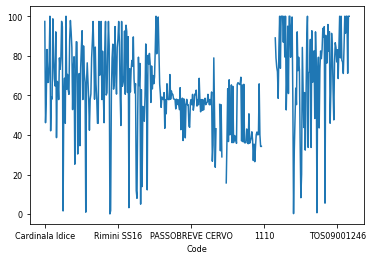

In [135]:
summarygapsstations.PercentageGaps.plot()

(<Figure size 1080x2160 with 2 Axes>, <AxesSubplot:>)

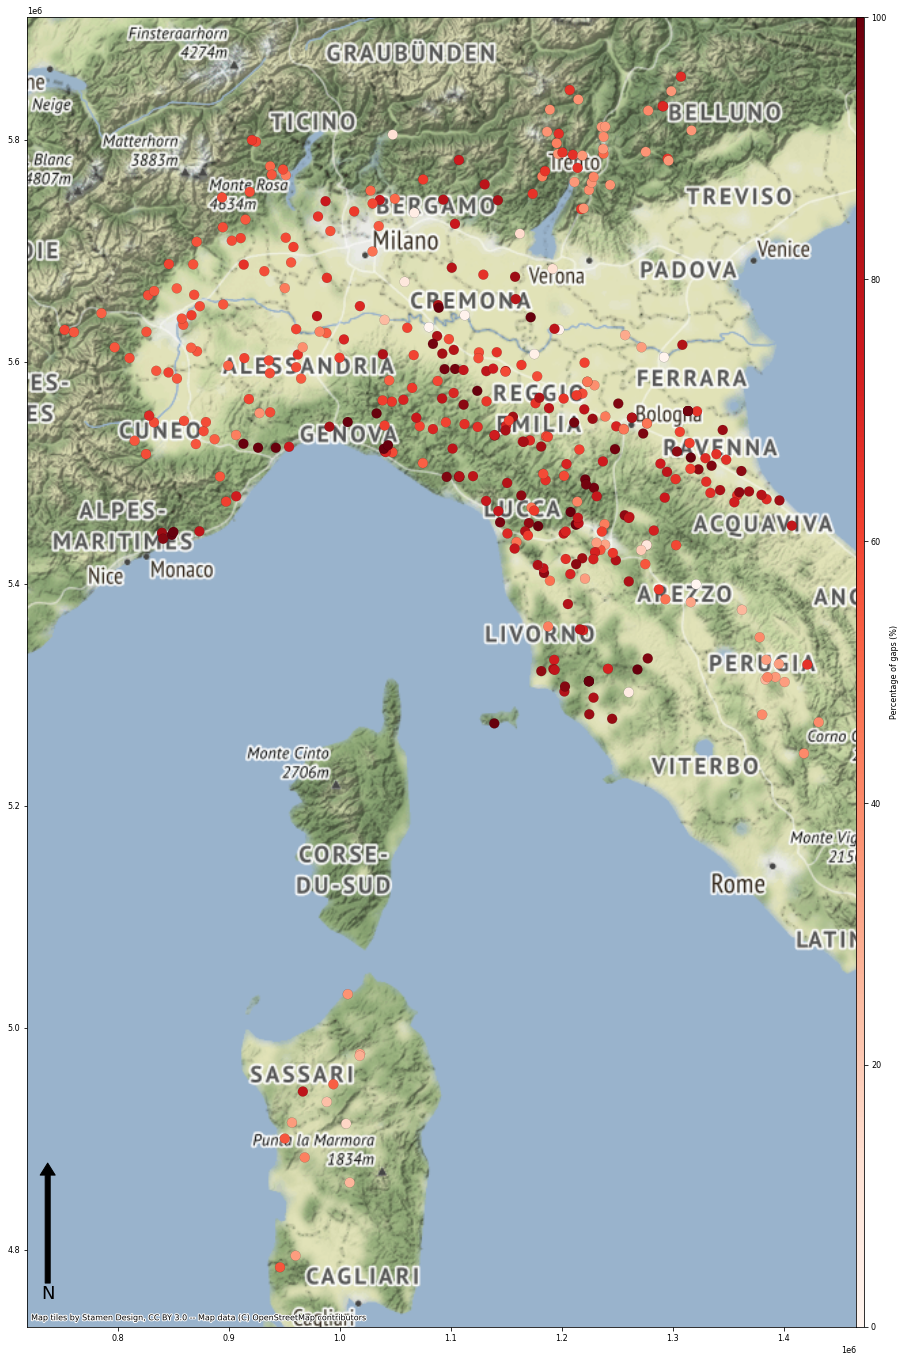

In [136]:
geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                             figsizeproj = (15, 30), cmapproj = "Reds", markersize_map = 100)

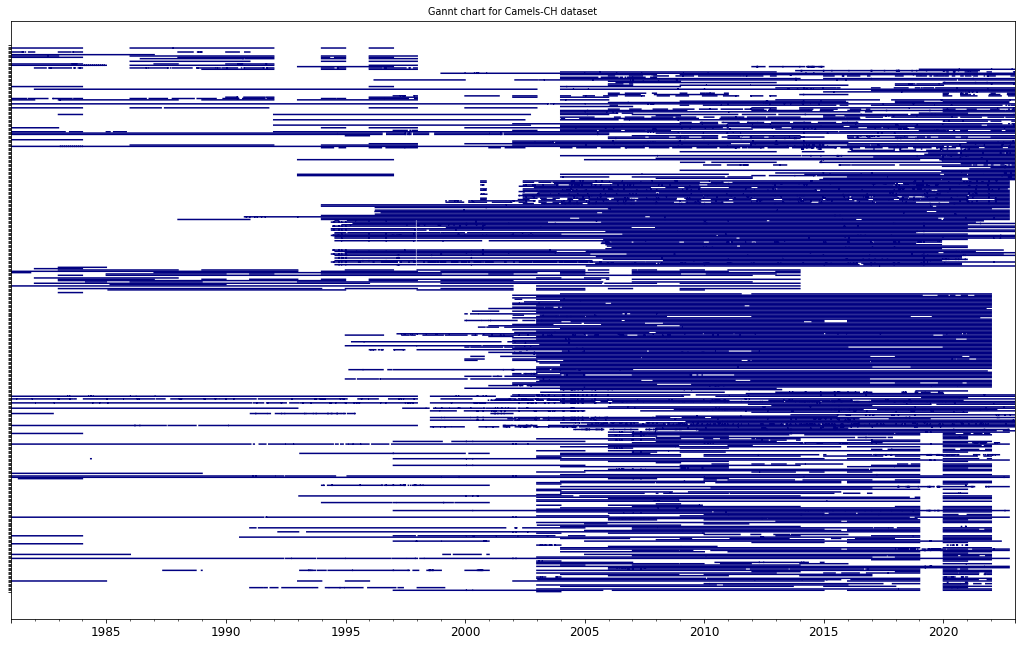

In [137]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_IT.loc["1981":"2022",:], figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart for Camels-CH dataset")

Check some of the gauges with gaps:

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

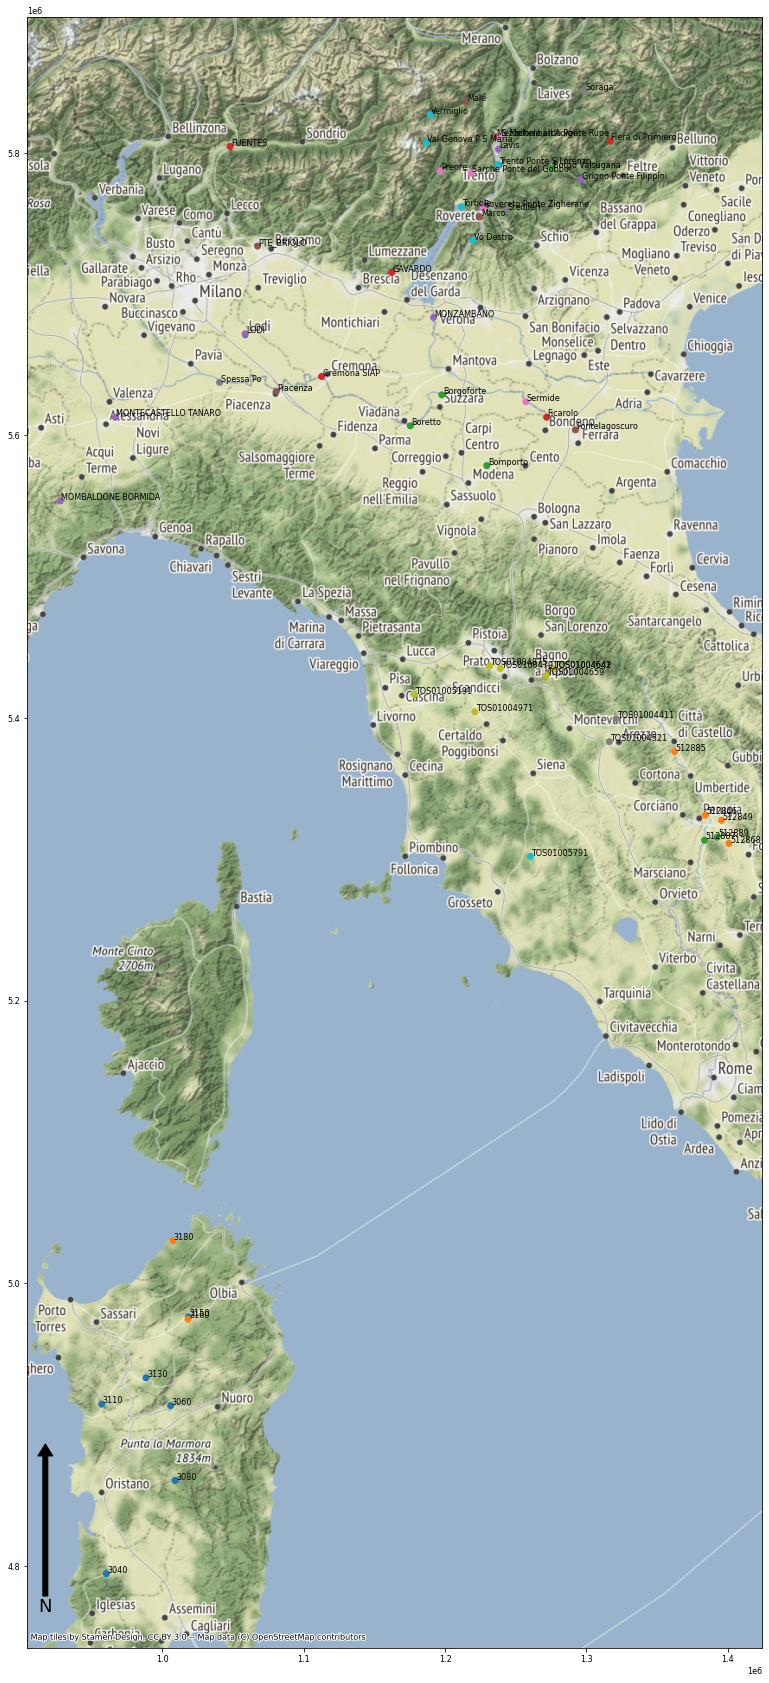

In [138]:
geospatialfunctions.plotpointsmap(summarygapsstations[summarygapsstations.PercentageGaps < 40.0], crsproj = 'epsg:4326', showcodes = True)

In [139]:
summarygapsstations[summarygapsstations.PercentageGaps < 50.0]

CoordX     CoordY  NumGaps  PercentageGaps   region  \
Code                                                                      
Castenaso        11.470171  44.507477   6412.0       46.199294   emilia   
Pracchia         10.905569  44.054038   5843.0       42.099575   emilia   
Bomporto         11.045084  44.727163   5364.0       38.648318   emilia   
Cremona SIAP      9.994838  45.128346    223.0        1.606744   emilia   
Ponte Bacchello  10.987340  44.747546   6376.0       45.939909   emilia   
...                    ...        ...      ...             ...      ...   
TOS01005191      10.585338  43.684586     95.0        0.684487  toscana   
TOS01005401      10.669822  43.323336   6045.0       43.555011  toscana   
TOS01005791      11.321926  42.934884    771.0        5.555155  toscana   
TOS02004195      10.535103  44.019750   6375.0       45.932704  toscana   
TOS02004311      10.414257  43.818859   6609.0       47.618705  toscana   

                                  geometry  
Code                                        
Castenaso        POINT (11.47017 44.50748)  
Pracchia         POINT (10.90557 44.05404)  
Bomporto         POINT (11.04508 44.72716)  
Cremona SIAP      POINT (9.99484 45.12835)  
Ponte Bacchello  POINT (10.98734 44.74755)  
...                                    ...  
TOS01005191      POINT (10.58534 43.68459)  
TOS01005401      POINT (10.66982 43.32334)  
TOS01005791      POINT (11.32193 42.93488)  
TOS02004195      POINT (10.53510 44.01975)  
TOS02004311      POINT (10.41426 43.81886)  

[87 rows x 6 columns]

In [19]:
summarygapsstations[summarygapsstations.PercentageGaps < 50.0].tail(50)

CoordX     CoordY  NumGaps  PercentageGaps  \
Code                                                                      
3180                       9.048544  41.120330   5199.0       37.459471   
Borgo Valsugana           11.460107  46.054072   5092.0       36.688522   
Cavalese Masi             11.479977  46.284856   5561.0       40.067728   
Cimego                    10.621964  45.915279   6106.0       43.994524   
Fiera di Primiero         11.829937  46.174083   5012.0       36.112112   
Grigno Ponte Filippini    11.644513  46.004275   5021.0       36.176958   
Lavis                     11.118599  46.138110   5518.0       39.757908   
Malé                      10.913822  46.347113   5156.0       37.149651   
Marco                     11.000874  45.839060   5472.0       39.426472   
Mezzolombardo Ponte Rupe  11.103355  46.193669   4963.0       35.759060   
Preore                    10.750111  46.042482   5132.0       36.976727   
Rovereto Ponte Zigherane  11.022282  45.880930   5075.0       36.566035   
S Michele all Adige       11.132340  46.195162   5008.0       36.083291   
Sarche Ponte del Gobbo    10.946496  46.033010   5003.0       36.047266   
Soraga                    11.666753  46.393701   5023.0       36.191368   
Spiazzo                   10.738969  46.102176   5974.0       43.043447   
Stedileri                 11.171923  45.867653   5196.0       37.437856   
Torbole                   10.882831  45.883986   4938.0       35.578932   
Trento Ponte S Lorenzo    11.115010  46.070134   4972.0       35.823907   
Val Genova P S Maria      10.661162  46.166699   5130.0       36.962317   
Vermiglio                 10.684134  46.290329   5330.0       38.403343   
Villa Lagarina            11.038306  45.912623   5774.0       41.602421   
Vò Destro                 10.957414  45.735043   5207.0       37.517112   
512887                    12.429167  43.010278   3760.0       27.091289   
512889                    12.509722  43.024722   4908.0       35.362778   
512885                    12.238889  43.421667   3677.0       26.493263   
512849                    12.537778  43.102778   4755.0       34.260393   
513035                    12.740278  42.571667   5571.0       40.139780   
513000                    12.445556  43.025000   5759.0       41.494344   
513031                    12.381944  43.260000   5564.0       40.089344   
513039                    12.859444  42.757778   5581.0       40.211831   
515864                    12.401944  42.802500   5572.0       40.146985   
512846                    12.435000  43.126944   4748.0       34.209957   
512868                    12.584167  42.995833   4751.0       34.231573   
TOS01004411               11.867846  43.571680     34.0        0.244974   
TOS01004521               11.824400  43.466859   4450.0       32.062829   
TOS01004568               11.618680  43.483529   6583.0       47.431371   
TOS01004641               11.466157  43.800787   5116.0       36.861445   
TOS01004642               11.467605  43.801236   1152.0        8.300310   
TOS01004659               11.422816  43.771197   2809.0       20.239210   
TOS01004779               11.127025  43.922906   6076.0       43.778370   
TOS01004791               11.130532  43.803684   4492.0       32.365444   
TOS01004875               11.061444  43.814591   4679.0       33.712804   
TOS01004971               10.968399  43.604484   4676.0       33.691188   
TOS01005131               10.684419  43.592285   6706.0       48.317602   
TOS01005191               10.585338  43.684586     95.0        0.684487   
TOS01005401               10.669822  43.323336   6045.0       43.555011   
TOS01005791               11.321926  42.934884    771.0        5.555155   
TOS02004195               10.535103  44.019750   6375.0       45.932704   
TOS02004311               10.414257  43.818859   6609.0       47.618705   

                            region                   geometry  
Code                                                           


In [83]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps < 50].index.tolist()

timeseriesfinalcondition = timeseries_IT.loc[:, idcondition]
timeseriesfinalcondition

Castenaso  Pracchia  Bomporto  Cremona SIAP  Ponte Bacchello  \
1958-09-01        NaN       NaN       NaN           NaN              NaN   
1958-09-02        NaN       NaN       NaN           NaN              NaN   
1958-09-03        NaN       NaN       NaN           NaN              NaN   
1958-09-04        NaN       NaN       NaN           NaN              NaN   
1958-09-05        NaN       NaN       NaN           NaN              NaN   
...               ...       ...       ...           ...              ...   
2022-12-27        NaN       NaN       NaN           NaN              NaN   
2022-12-28        NaN       NaN       NaN           NaN              NaN   
2022-12-29        NaN       NaN       NaN           NaN              NaN   
2022-12-30        NaN       NaN       NaN           NaN              NaN   
2022-12-31        NaN       NaN       NaN           NaN              NaN   

            Spessa Po  Sermide  Ficarolo  Pontelagoscuro  Casalecchio canale  \
1958-09-01        NaN      NaN       NaN             NaN                 NaN   
1958-09-02        NaN      NaN       NaN             NaN                 NaN   
1958-09-03        NaN      NaN       NaN             NaN                 NaN   
1958-09-04        NaN      NaN       NaN             NaN                 NaN   
1958-09-05        NaN      NaN       NaN             NaN                 NaN   
...               ...      ...       ...             ...                 ...   
2022-12-27        NaN      NaN       NaN             NaN                 NaN   
2022-12-28        NaN      NaN       NaN             NaN                 NaN   
2022-12-29        NaN      NaN       NaN             NaN                 NaN   
2022-12-30        NaN      NaN       NaN             NaN                 NaN   
2022-12-31        NaN      NaN       NaN             NaN                 NaN   

            ...  TOS01004779  TOS01004791  TOS01004875  TOS01004971  \
1958-09-01  ...        3.330          NaN          NaN        1.230   
1958-09-02  ...        0.900          NaN          NaN        1.560   
1958-09-03  ...        0.530          NaN          NaN        1.460   
1958-09-04  ...        0.310          NaN          NaN        1.320   
1958-09-05  ...        0.260          NaN          NaN        1.260   
...         ...          ...          ...          ...          ...   
2022-12-27  ...        2.579        4.834        4.612        2.153   
2022-12-28  ...        2.164        4.382        4.303        2.084   
2022-12-29  ...        3.401        4.782        6.540        2.157   
2022-12-30  ...        3.759        5.246        5.919        2.008   
2022-12-31  ...        4.177        5.729        7.364        1.937   

            TOS01005131  TOS01005191  TOS01005401  TOS01005791  TOS02004195  \
1958-09-01          NaN        5.500        0.010        1.550          NaN   
1958-09-02          NaN        5.200        0.010        1.450          NaN   
1958-09-03          NaN        5.380        0.010        1.450          NaN   
1958-09-04          NaN        5.500        0.010        1.450          NaN   
1958-09-05          NaN        5.200        0.010        1.450          NaN   
...                 ...          ...          ...          ...          ...   
2022-12-27        0.609       63.038        2.171       14.756        6.358   
2022-12-28        0.518       67.026        2.074       14.005        6.301   
2022-12-29        0.607       67.702        2.024       13.069        7.034   
2022-12-30        0.442       61.284        1.962       12.373       13.881   
2022-12-31        0.398       57.150        1.883       12.258       14.896   

            TOS02004311  
1958-09-01          NaN  
1958-09-02          NaN  
1958-09-03          NaN  
1958-09-04          NaN  
1958-09-05          NaN  
...                 ...  
2022-12-27       29.759  
2022-12-28       30.051  
2022-12-29       37.600  
2022-12-30       64.739  
2022-12-31       98.546  

[23498 rows x 87 column

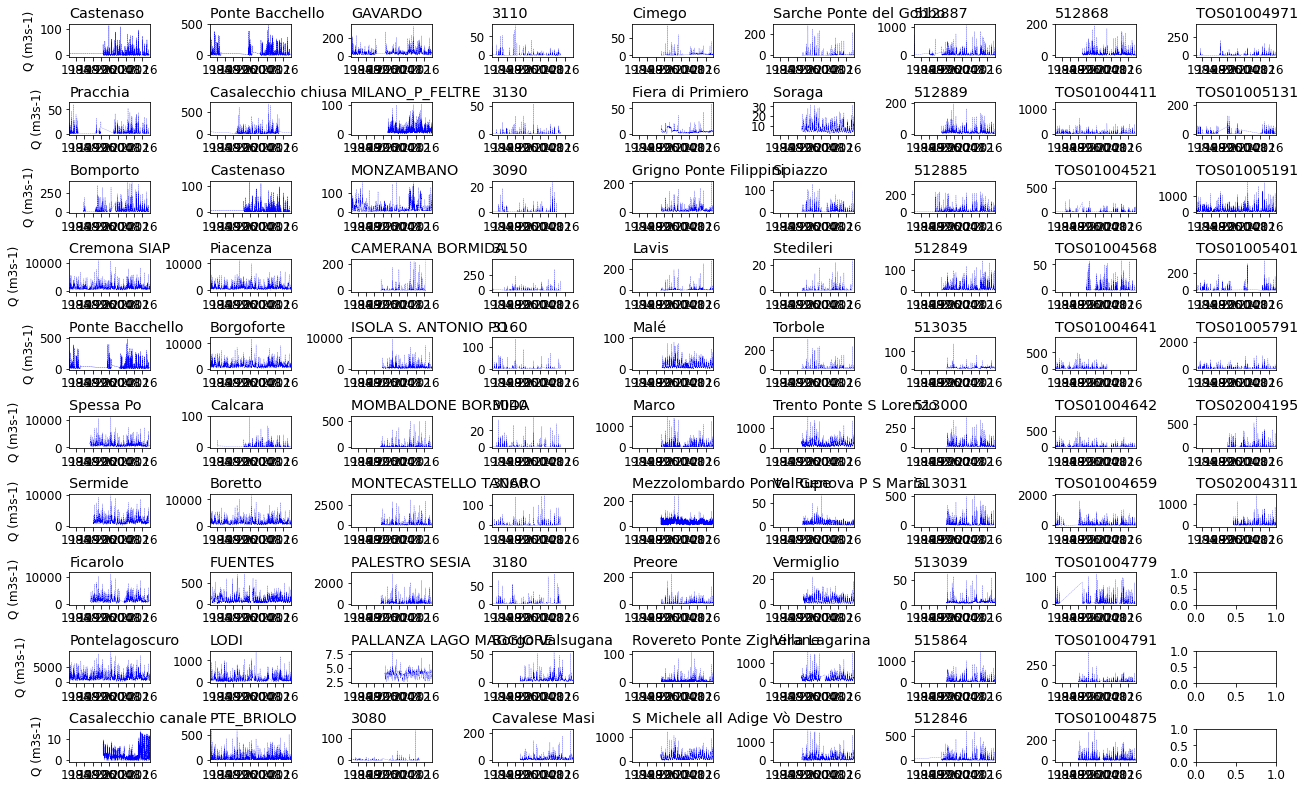

In [21]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 10, numc = 9, datatoplot = timeseriesfinalcondition, setylim = False, ymin = 0, ymax = 1, figsizeproj = (18, 11),
                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  ylabelplot = "Q (m3s-1)",
                   datestart = datetime.date(1980, 10, 1), dateend = datetime.date(2019, 9, 30),
                   setnumberofintervals = False, numberintervals = 2)

In [48]:
idcondition = summarygapsstations[(summarygapsstations.region == "toscana") & (summarygapsstations.PercentageGaps < 50)].index.tolist()

timeseriesfinalcondition_toscana = timeseries_IT.loc[:, idcondition]
timeseriesfinalcondition_toscana

TOS01004411  TOS01004521  TOS01004568  TOS01004641  TOS01004642  \
1958-09-01        3.130        0.000          NaN         0.93        0.930   
1958-09-02        1.720        0.000          NaN         1.19        1.190   
1958-09-03        1.280        0.000          NaN         1.00        1.000   
1958-09-04        1.030        0.000          NaN         0.68        0.680   
1958-09-05        0.870        0.000          NaN         0.54        0.540   
...                 ...          ...          ...          ...          ...   
2022-12-27       12.046        5.519        0.993          NaN       12.120   
2022-12-28       10.996        5.184        0.797          NaN       11.085   
2022-12-29       10.492        4.841        0.760          NaN       10.424   
2022-12-30        9.819        4.747        0.686          NaN        9.743   
2022-12-31       10.566        4.498        0.649          NaN       12.725   

            TOS01004659  TOS01004779  TOS01004791  TOS01004875  TOS01004971  \
1958-09-01        3.120        3.330          NaN          NaN        1.230   
1958-09-02        2.520        0.900          NaN          NaN        1.560   
1958-09-03        2.400        0.530          NaN          NaN        1.460   
1958-09-04        2.150        0.310          NaN          NaN        1.320   
1958-09-05        1.570        0.260          NaN          NaN        1.260   
...                 ...          ...          ...          ...          ...   
2022-12-27       45.105        2.579        4.834        4.612        2.153   
2022-12-28       44.001        2.164        4.382        4.303        2.084   
2022-12-29       43.360        3.401        4.782        6.540        2.157   
2022-12-30       17.892        3.759        5.246        5.919        2.008   
2022-12-31       26.520        4.177        5.729        7.364        1.937   

            TOS01005131  TOS01005191  TOS01005401  TOS01005791  TOS02004195  \
1958-09-01          NaN        5.500        0.010        1.550          NaN   
1958-09-02          NaN        5.200        0.010        1.450          NaN   
1958-09-03          NaN        5.380        0.010        1.450          NaN   
1958-09-04          NaN        5.500        0.010        1.450          NaN   
1958-09-05          NaN        5.200        0.010        1.450          NaN   
...                 ...          ...          ...          ...          ...   
2022-12-27        0.609       63.038        2.171       14.756        6.358   
2022-12-28        0.518       67.026        2.074       14.005        6.301   
2022-12-29        0.607       67.702        2.024       13.069        7.034   
2022-12-30        0.442       61.284        1.962       12.373       13.881   
2022-12-31        0.398       57.150        1.883       12.258       14.896   

            TOS02004311  
1958-09-01          NaN  
1958-09-02          NaN  
1958-09-03          NaN  
1958-09-04          NaN  
1958-09-05          NaN  
...                 ...  
2022-12-27       29.759  
2022-12-28       30.051  
2022-12-29       37.600  
2022-12-30       64.739  
2022-12-31       98.546  

[23498 rows x 16 columns]

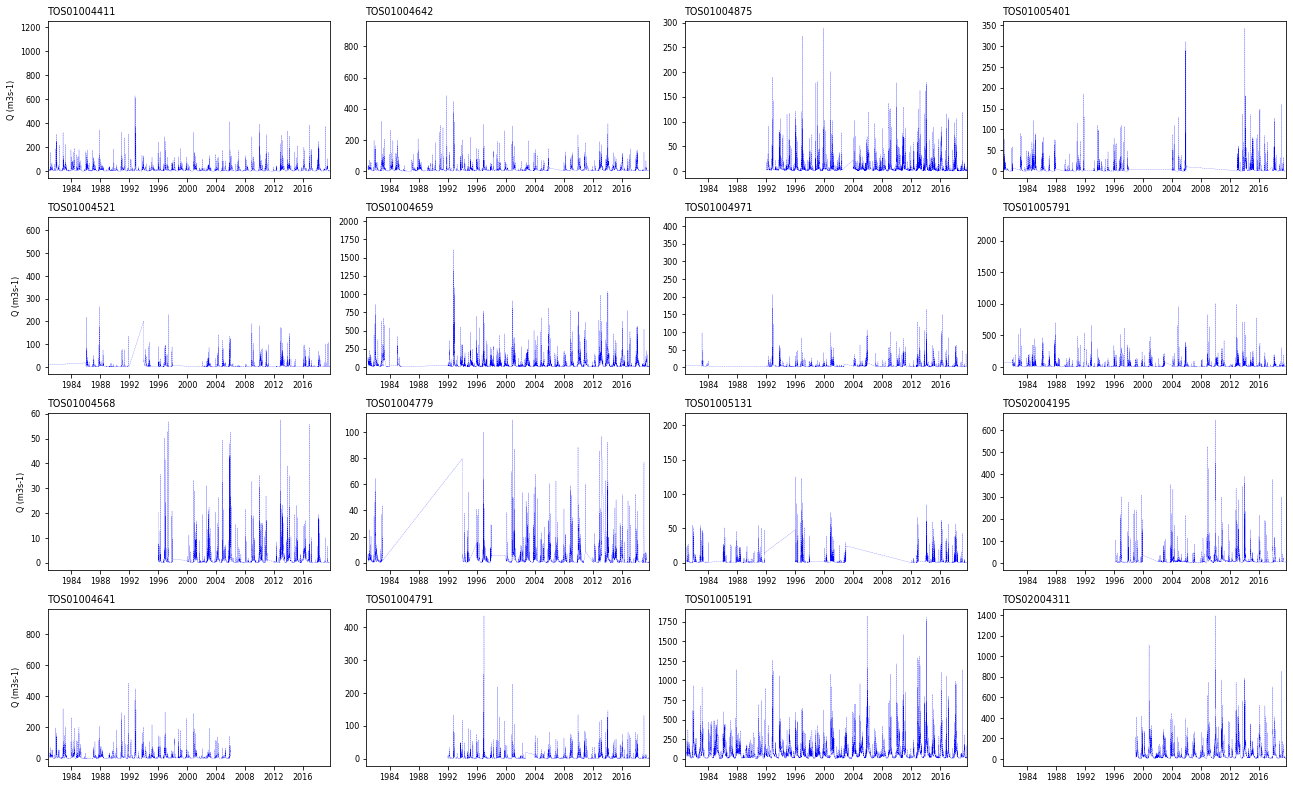

In [49]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 4, numc = 4, datatoplot = timeseriesfinalcondition_toscana, setylim = False, ymin = 0, ymax = 1, figsizeproj = (18, 11),
                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  ylabelplot = "Q (m3s-1)",
                   datestart = datetime.date(1980, 10, 1), dateend = datetime.date(2019, 9, 30),
                   setnumberofintervals = False, numberintervals = 2)

In [61]:
corr_matrix = timeseriesfinalcondition_toscana.corr()

<AxesSubplot:>

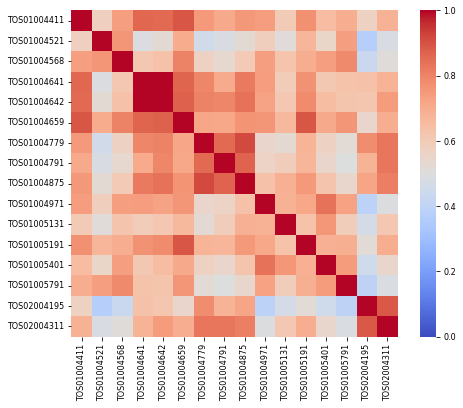

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True, vmin=0, vmax=1)

In [45]:
idcondition = summarygapsstations[(summarygapsstations.region == "umbria") & (summarygapsstations.PercentageGaps < 50)].index.tolist()

timeseriesfinalcondition_umbria = timeseries_IT.loc[:, idcondition]
timeseriesfinalcondition_umbria

512887  512889  512885  512849  513035  513000  513031  513039  \
1958-09-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1958-09-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1958-09-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1958-09-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1958-09-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2022-12-27     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2022-12-28     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2022-12-29     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2022-12-30     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2022-12-31     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

            515864  512846  512868  
1958-09-01     NaN     NaN     NaN  
1958-09-02     NaN     NaN     NaN  
1958-09-03     NaN     NaN     NaN  
1958-09-04     NaN     NaN     NaN  
1958-09-05     NaN     NaN     NaN  
...            ...     ...     ...  
2022-12-27     NaN     NaN     NaN  
2022-12-28     NaN     NaN     NaN  
2022-12-29     NaN     NaN     NaN  
2022-12-30     NaN     NaN     NaN  
2022-12-31     NaN     NaN     NaN  

[23498 rows x 11 columns]

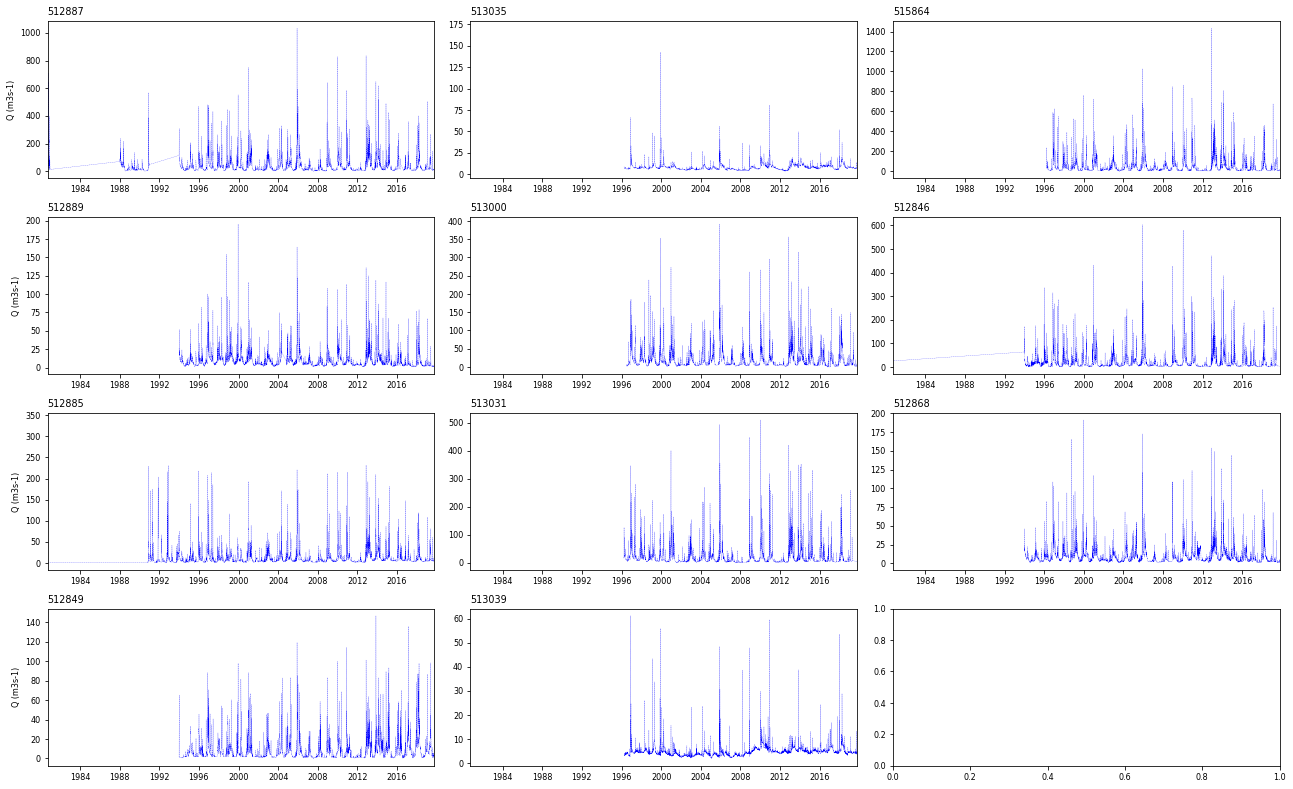

In [46]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 4, numc = 3, datatoplot = timeseriesfinalcondition_umbria, setylim = False, ymin = 0, ymax = 1, figsizeproj = (18, 11),
                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  ylabelplot = "Q (m3s-1)",
                   datestart = datetime.date(1980, 10, 1), dateend = datetime.date(2019, 9, 30),
                   setnumberofintervals = False, numberintervals = 2)

In [47]:
timeseriesfinalcondition_umbria.corr()

512887    512889    512885    512849    513035    513000    513031  \
512887  1.000000  0.868152  0.849923  0.825688  0.457202  0.875899  0.906936   
512889  0.868152  1.000000  0.720846  0.757767  0.500804  0.899656  0.788069   
512885  0.849923  0.720846  1.000000  0.693897  0.363260  0.721549  0.952359   
512849  0.825688  0.757767  0.693897  1.000000  0.444276  0.842619  0.749251   
513035  0.457202  0.500804  0.363260  0.444276  1.000000  0.507183  0.388794   
513000  0.875899  0.899656  0.721549  0.842619  0.507183  1.000000  0.781245   
513031  0.906936  0.788069  0.952359  0.749251  0.388794  0.781245  1.000000   
513039  0.473509  0.525335  0.394313  0.465278  0.624241  0.495584  0.433456   
515864  0.943812  0.874357  0.847443  0.842573  0.462492  0.887322  0.897043   
512846  0.932074  0.811189  0.913380  0.773627  0.406547  0.814889  0.986738   
512868  0.851036  0.972636  0.709499  0.748244  0.504376  0.890178  0.766508   

          513039    515864    512846    512868  
512887  0.473509  0.943812  0.932074  0.851036  
512889  0.525335  0.874357  0.811189  0.972636  
512885  0.394313  0.847443  0.913380  0.709499  
512849  0.465278  0.842573  0.773627  0.748244  
513035  0.624241  0.462492  0.406547  0.504376  
513000  0.495584  0.887322  0.814889  0.890178  
513031  0.433456  0.897043  0.986738  0.766508  
513039  1.000000  0.458766  0.445035  0.551268  
515864  0.458766  1.000000  0.931332  0.849896  
512846  0.445035  0.931332  1.000000  0.789446  
512868  0.551268  0.849896  0.789446  1.000000

In [52]:
idcondition = summarygapsstations[(summarygapsstations.region == "sardegna") & (summarygapsstations.PercentageGaps < 50)].index.tolist()

timeseriesfinalcondition_sardegna = timeseries_IT.loc[:, idcondition]
timeseriesfinalcondition_sardegna

3080  3110  3130  3090  3150  3160  3040  3060  3180
1958-09-01  0.06   NaN   NaN   NaN   0.0   0.0   NaN   NaN   NaN
1958-09-02  0.11   NaN   NaN   NaN   0.0   0.0   NaN   NaN   NaN
1958-09-03  0.11   NaN   NaN   NaN   0.0   0.0   NaN   NaN   NaN
1958-09-04  0.11   NaN   NaN   NaN   0.0   0.0   NaN   NaN   NaN
1958-09-05  0.11   NaN   NaN   NaN   0.0   0.0   NaN   NaN   NaN
...          ...   ...   ...   ...   ...   ...   ...   ...   ...
2022-12-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2022-12-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2022-12-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2022-12-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2022-12-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

[23498 rows x 9 columns]

In [53]:
timeseriesfinalcondition_sardegna.corr()

3080      3110      3130      3090      3150      3160      3040  \
3080  1.000000  0.466433  0.458592  0.445353  0.375954  0.674872  0.317006   
3110  0.466433  1.000000  0.645010  0.721940  0.383301  0.593804  0.418973   
3130  0.458592  0.645010  1.000000  0.619176  0.450304  0.558824  0.357005   
3090  0.445353  0.721940  0.619176  1.000000  0.289272  0.501545  0.481707   
3150  0.375954  0.383301  0.450304  0.289272  1.000000  0.664397  0.288822   
3160  0.674872  0.593804  0.558824  0.501545  0.664397  1.000000  0.302700   
3040  0.317006  0.418973  0.357005  0.481707  0.288822  0.302700  1.000000   
3060  0.544892  0.585645  0.565677  0.498237  0.630915  0.742694  0.366135   
3180  0.295180  0.441628  0.419903  0.379755  0.557091  0.567429  0.333927   

          3060      3180  
3080  0.544892  0.295180  
3110  0.585645  0.441628  
3130  0.565677  0.419903  
3090  0.498237  0.379755  
3150  0.630915  0.557091  
3160  0.742694  0.567429  
3040  0.366135  0.333927  
3060  1.000000  0.495836  
3180  0.495836  1.000000

In [54]:
idcondition = summarygapsstations[(summarygapsstations.region == "trento") & (summarygapsstations.PercentageGaps < 50)].index.tolist()

timeseriesfinalcondition_trento = timeseries_IT.loc[:, idcondition]
timeseriesfinalcondition_trento

Borgo Valsugana  Cavalese Masi  Cimego  Fiera di Primiero  \
1958-09-01              NaN            NaN     NaN                NaN   
1958-09-02              NaN            NaN     NaN                NaN   
1958-09-03              NaN            NaN     NaN                NaN   
1958-09-04              NaN            NaN     NaN                NaN   
1958-09-05              NaN            NaN     NaN                NaN   
...                     ...            ...     ...                ...   
2022-12-27              NaN       3.815521     NaN                NaN   
2022-12-28              NaN       3.682812     NaN                NaN   
2022-12-29              NaN       3.897083     NaN                NaN   
2022-12-30              NaN       3.866042     NaN                NaN   
2022-12-31              NaN       3.739896     NaN                NaN   

            Grigno Ponte Filippini  Lavis      Malé  Marco  \
1958-09-01                     NaN    NaN       NaN    NaN   
1958-09-02                     NaN    NaN       NaN    NaN   
1958-09-03                     NaN    NaN       NaN    NaN   
1958-09-04                     NaN    NaN       NaN    NaN   
1958-09-05                     NaN    NaN       NaN    NaN   
...                            ...    ...       ...    ...   
2022-12-27                7.851771    NaN  4.168958    NaN   
2022-12-28                7.771563    NaN  4.636771    NaN   
2022-12-29                7.803646    NaN  5.047187    NaN   
2022-12-30                7.811146    NaN  4.334167    NaN   
2022-12-31                7.713333    NaN  3.955417    NaN   

            Mezzolombardo Ponte Rupe  Preore  ...  Sarche Ponte del Gobbo  \
1958-09-01                       NaN     NaN  ...                     NaN   
1958-09-02                       NaN     NaN  ...                     NaN   
1958-09-03                       NaN     NaN  ...                     NaN   
1958-09-04                       NaN     NaN  ...                     NaN   
1958-09-05                       NaN     NaN  ...                     NaN   
...                              ...     ...  ...                     ...   
2022-12-27                       NaN     NaN  ...                 2.71625   
2022-12-28                       NaN     NaN  ...                 2.77500   
2022-12-29                       NaN     NaN  ...                 2.78125   
2022-12-30                       NaN     NaN  ...                 2.83250   
2022-12-31                       NaN     NaN  ...                 2.83875   

              Soraga  Spiazzo  Stedileri  Torbole  Trento Ponte S Lorenzo  \
1958-09-01       NaN      NaN        NaN      NaN                     NaN   
1958-09-02       NaN      NaN        NaN      NaN                     NaN   
1958-09-03       NaN      NaN        NaN      NaN                     NaN   
1958-09-04       NaN      NaN        NaN      NaN                     NaN   
1958-09-05       NaN      NaN        NaN      NaN                     NaN   
...              ...      ...        ...      ...                     ...   
2022-12-27  3.195312      NaN        NaN      NaN               79.198333   
2022-12-28  3.166667      NaN        NaN      NaN               78.970729   
2022-12-29  3.194271      NaN        NaN      NaN               83.683854   
2022-12-30  3.196042      NaN        NaN      NaN               81.333438   
2022-12-31  3.145208      NaN        NaN      NaN               88.795729   

            Val Genova P S Maria  Vermiglio  Villa Lagarina  Vò Destro  
1958-09-01                   NaN        NaN             NaN        NaN  
1958-09-02                   NaN        NaN             NaN        NaN  
1958-09-03                   NaN        NaN             NaN        NaN  
1958-09-04                   NaN        NaN             NaN        NaN  
1958-09-05                   NaN        NaN             NaN        NaN  
...                          ...        ...             ...        ...  
2022-12-27                   

In [69]:
corr_matrix = timeseriesfinalcondition_trento.corr()
corr_matrix

Borgo Valsugana  Cavalese Masi    Cimego  \
Borgo Valsugana                  1.000000       0.571955  0.375692   
Cavalese Masi                    0.571955       1.000000  0.400847   
Cimego                           0.375692       0.400847  1.000000   
Fiera di Primiero                0.289915       0.353892  0.072427   
Grigno Ponte Filippini           0.898615       0.785195  0.461951   
Lavis                            0.662658       0.762768  0.498374   
Malé                             0.352649       0.725328  0.310188   
Marco                            0.532511       0.769282  0.371918   
Mezzolombardo Ponte Rupe         0.442031       0.435997  0.145560   
Preore                           0.469582       0.598563  0.654601   
Rovereto Ponte Zigherane         0.844143       0.639191  0.348464   
S Michele all Adige              0.392928       0.752477  0.309965   
Sarche Ponte del Gobbo           0.429998       0.511298  0.698554   
Soraga                           0.385121       0.800336  0.232053   
Spiazzo                          0.406053       0.594547  0.562071   
Stedileri                        0.631632       0.508073  0.454916   
Torbole                          0.440233       0.501179  0.604589   
Trento Ponte S Lorenzo           0.483489       0.781686  0.350903   
Val Genova P S Maria            -0.048375       0.234645 -0.041459   
Vermiglio                        0.175078       0.633946  0.176950   
Villa Lagarina                   0.530117       0.792671  0.352264   
Vò Destro                        0.548095       0.783782  0.323935   

                          Fiera di Primiero  Grigno Ponte Filippini     Lavis  \
Borgo Valsugana                    0.289915                0.898615  0.662658   
Cavalese Masi                      0.353892                0.785195  0.762768   
Cimego                             0.072427                0.461951  0.498374   
Fiera di Primiero                  1.000000                0.378965  0.410379   
Grigno Ponte Filippini             0.378965                1.000000  0.804374   
Lavis                              0.410379                0.804374  1.000000   
Malé                               0.286756                0.533301  0.449963   
Marco                              0.339092                0.695352  0.702733   
Mezzolombardo Ponte Rupe           0.339966                0.469871  0.419831   
Preore                             0.212244                0.582808  0.564037   
Rovereto Ponte Zigherane           0.327911                0.887752  0.651675   
S Michele all Adige                0.273384                0.573759  0.511915   
Sarche Ponte del Gobbo             0.305447                0.530069  0.644761   
Soraga                             0.335277                0.597928  0.514389   
Spiazzo                            0.297359                0.518720  0.556920   
Stedileri                          0.310406                0.677700  0.630821   
Torbole                            0.231684                0.544100  0.623317   
Trento Ponte S Lorenzo             0.382513                0.659090  0.606431   
Val Genova P S Maria               0.085218                0.005857  0.073332   
Vermiglio                          0.191505                0.356151  0.282627   
Villa Lagarina                     0.342242                0.693443  0.647507   
Vò Destro                          0.362005                0.701641  0.650021   

                              Malé     Marco  Mezzolombardo Ponte Rupe  \
Borgo Valsugana           0.352649  0.532511                  0.442031   
Cavalese Masi             0.725328  0.769282                  0.435997   
Cimego                    0.310188  0.371918                  0.145560   
Fiera di Primiero         0.286756  0.339092                  0.339966   
Grigno Ponte Filippini    0.533301  0.695352                  0.469871   
Lavis                     0.449963  0.702733                  0.419831   
Malé                      1.00000

<AxesSubplot:>

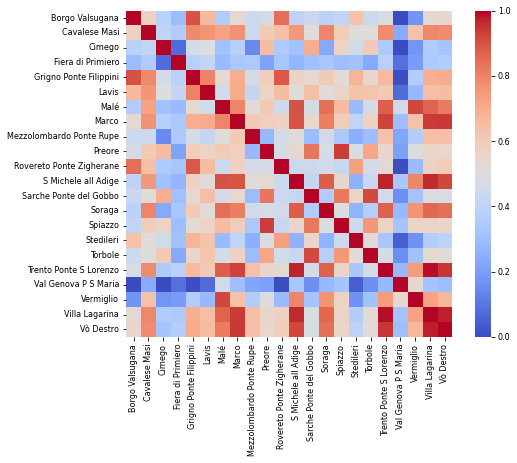

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True, vmin=0, vmax=1)

In [79]:
idcondition = summarygapsstations[(summarygapsstations.region == "emilia") & (summarygapsstations.PercentageGaps < 50)].index.tolist()

timeseriesfinalcondition_emilia = timeseries_IT.loc[:, idcondition]
timeseriesfinalcondition_emilia

Castenaso  Pracchia  Bomporto  Cremona SIAP  Ponte Bacchello  \
1958-09-01        NaN       NaN       NaN           NaN              NaN   
1958-09-02        NaN       NaN       NaN           NaN              NaN   
1958-09-03        NaN       NaN       NaN           NaN              NaN   
1958-09-04        NaN       NaN       NaN           NaN              NaN   
1958-09-05        NaN       NaN       NaN           NaN              NaN   
...               ...       ...       ...           ...              ...   
2022-12-27        NaN       NaN       NaN           NaN              NaN   
2022-12-28        NaN       NaN       NaN           NaN              NaN   
2022-12-29        NaN       NaN       NaN           NaN              NaN   
2022-12-30        NaN       NaN       NaN           NaN              NaN   
2022-12-31        NaN       NaN       NaN           NaN              NaN   

            Spessa Po  Sermide  Ficarolo  Pontelagoscuro  Casalecchio canale  \
1958-09-01        NaN      NaN       NaN             NaN                 NaN   
1958-09-02        NaN      NaN       NaN             NaN                 NaN   
1958-09-03        NaN      NaN       NaN             NaN                 NaN   
1958-09-04        NaN      NaN       NaN             NaN                 NaN   
1958-09-05        NaN      NaN       NaN             NaN                 NaN   
...               ...      ...       ...             ...                 ...   
2022-12-27        NaN      NaN       NaN             NaN                 NaN   
2022-12-28        NaN      NaN       NaN             NaN                 NaN   
2022-12-29        NaN      NaN       NaN             NaN                 NaN   
2022-12-30        NaN      NaN       NaN             NaN                 NaN   
2022-12-31        NaN      NaN       NaN             NaN                 NaN   

            Ponte Bacchello  Casalecchio chiusa  Castenaso  Piacenza  \
1958-09-01              NaN                 NaN        NaN       NaN   
1958-09-02              NaN                 NaN        NaN       NaN   
1958-09-03              NaN                 NaN        NaN       NaN   
1958-09-04              NaN                 NaN        NaN       NaN   
1958-09-05              NaN                 NaN        NaN       NaN   
...                     ...                 ...        ...       ...   
2022-12-27              NaN                 NaN        NaN       NaN   
2022-12-28              NaN                 NaN        NaN       NaN   
2022-12-29              NaN                 NaN        NaN       NaN   
2022-12-30              NaN                 NaN        NaN       NaN   
2022-12-31              NaN                 NaN        NaN       NaN   

            Borgoforte  Calcara  Boretto  
1958-09-01         NaN      NaN      NaN  
1958-09-02         NaN      NaN      NaN  
1958-09-03         NaN      NaN      NaN  
1958-09-04         NaN      NaN      NaN  
1958-09-05         NaN      NaN      NaN  
...                ...      ...      ...  
2022-12-27         NaN      NaN      NaN  
2022-12-28         NaN      NaN      NaN  
2022-12-29         NaN      NaN      NaN  
2022-12-30         NaN      NaN      NaN  
2022-12-31         NaN      NaN      NaN  

[23498 rows x 17 columns]

In [73]:
corr_matrix = timeseriesfinalcondition_emilia.corr()
corr_matrix

Castenaso  Pracchia  Bomporto  Cremona SIAP  \
Castenaso            1.000000  0.518284  0.683281      0.195622   
Pracchia             0.518284  1.000000  0.645406      0.217045   
Bomporto             0.683281  0.645406  1.000000      0.356259   
Cremona SIAP         0.195622  0.217045  0.356259      1.000000   
Ponte Bacchello      0.622793  0.546971  0.900687      0.400767   
Spessa Po            0.164618  0.229323  0.300595      0.921154   
Sermide              0.243242  0.233328  0.367140      0.901886   
Ficarolo             0.263090  0.247789  0.381487      0.889130   
Pontelagoscuro       0.250552  0.206820  0.361043      0.879559   
Casalecchio canale   0.033390  0.010480  0.057754      0.091193   
Ponte Bacchello      0.622793  0.546971  0.900687      0.400767   
Casalecchio chiusa   0.723380  0.838441  0.814861      0.257005   
Castenaso            1.000000  0.518284  0.683281      0.195622   
Piacenza             0.186276  0.225368  0.336592      0.976117   
Borgoforte           0.240237  0.230192  0.384068      0.939310   
Calcara              0.841677  0.421852  0.634318      0.157644   
Boretto              0.236888  0.239640  0.383907      0.965973   

                    Ponte Bacchello  Spessa Po   Sermide  Ficarolo  \
Castenaso                  0.622793   0.164618  0.243242  0.263090   
Pracchia                   0.546971   0.229323  0.233328  0.247789   
Bomporto                   0.900687   0.300595  0.367140  0.381487   
Cremona SIAP               0.400767   0.921154  0.901886  0.889130   
Ponte Bacchello            1.000000   0.357468  0.472671  0.486753   
Spessa Po                  0.357468   1.000000  0.811931  0.798692   
Sermide                    0.472671   0.811931  1.000000  0.996839   
Ficarolo                   0.486753   0.798692  0.996839  1.000000   
Pontelagoscuro             0.444295   0.772820  0.989768  0.992937   
Casalecchio canale         0.078197   0.070116  0.127246  0.117503   
Ponte Bacchello            1.000000   0.357468  0.472671  0.486753   
Casalecchio chiusa         0.730861   0.221289  0.290337  0.296589   
Castenaso                  0.622793   0.164618  0.243242  0.263090   
Piacenza                   0.386470   0.954923  0.860133  0.847469   
Borgoforte                 0.454447   0.832192  0.987865  0.984759   
Calcara                    0.585091   0.128009  0.184177  0.200459   
Boretto                    0.450227   0.866870  0.971084  0.966802   

                    Pontelagoscuro  Casalecchio canale  Ponte Bacchello  \
Castenaso                 0.250552            0.033390         0.622793   
Pracchia                  0.206820            0.010480         0.546971   
Bomporto                  0.361043            0.057754         0.900687   
Cremona SIAP              0.879559            0.091193         0.400767   
Ponte Bacchello           0.444295            0.078197         1.000000   
Spessa Po                 0.772820            0.070116         0.357468   
Sermide                   0.989768            0.127246         0.472671   
Ficarolo                  0.992937            0.117503         0.486753   
Pontelagoscuro            1.000000            0.125298         0.444295   
Casalecchio canale        0.125298            1.000000         0.078197   
Ponte Bacchello           0.444295            0.078197         1.000000   
Casalecchio chiusa        0.295105           -0.021396         0.730861   
Castenaso                 0.250552            0.033390         0.622793   
Piacenza                  0.842674            0.076828         0.386470   
Borgoforte                0.972938            0.117945         0.454447   
Calcara                   0.195254           -0.005196         0.585091   
Boretto                   0.954801            0.096419         0.450227   

                    Casalecchio chiusa  Castenaso  Piacenza  Borgoforte  \
Castenaso                     0.723380   1.000000  0.186276    0.240237   
Pracchia                      0.838441   0.518284  

<AxesSubplot:>

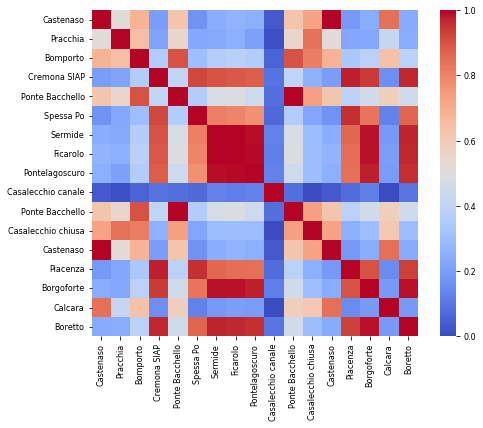

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True, vmin=0, vmax=1)

In [80]:
idcondition = summarygapsstations[(summarygapsstations.region == "lombardia") & (summarygapsstations.PercentageGaps < 50)].index.tolist()

timeseriesfinalcondition_lombardia = timeseries_IT.loc[:, idcondition]
timeseriesfinalcondition_lombardia

FUENTES  LODI  PTE_BRIOLO  GAVARDO  MILANO_P_FELTRE  MONZAMBANO
1958-09-01      NaN   NaN         NaN      NaN              NaN         NaN
1958-09-02      NaN   NaN         NaN      NaN              NaN         NaN
1958-09-03      NaN   NaN         NaN      NaN              NaN         NaN
1958-09-04      NaN   NaN         NaN      NaN              NaN         NaN
1958-09-05      NaN   NaN         NaN      NaN              NaN         NaN
...             ...   ...         ...      ...              ...         ...
2022-12-27      NaN   NaN         NaN      NaN              NaN         NaN
2022-12-28      NaN   NaN         NaN      NaN              NaN         NaN
2022-12-29      NaN   NaN         NaN      NaN              NaN         NaN
2022-12-30      NaN   NaN         NaN      NaN              NaN         NaN
2022-12-31      NaN   NaN         NaN      NaN              NaN         NaN

[23498 rows x 6 columns]

In [81]:
corr_matrix = timeseriesfinalcondition_lombardia.corr()
corr_matrix

FUENTES      LODI  PTE_BRIOLO   GAVARDO  MILANO_P_FELTRE  \
FUENTES          1.000000  0.591790    0.549998  0.564654         0.364442   
LODI             0.591790  1.000000    0.704223  0.677958         0.756518   
PTE_BRIOLO       0.549998  0.704223    1.000000  0.690329         0.787391   
GAVARDO          0.564654  0.677958    0.690329  1.000000         0.709027   
MILANO_P_FELTRE  0.364442  0.756518    0.787391  0.709027         1.000000   
MONZAMBANO       0.383552  0.351889    0.239966  0.520394         0.464349   

                 MONZAMBANO  
FUENTES            0.383552  
LODI               0.351889  
PTE_BRIOLO         0.239966  
GAVARDO            0.520394  
MILANO_P_FELTRE    0.464349  
MONZAMBANO         1.000000

<AxesSubplot:>

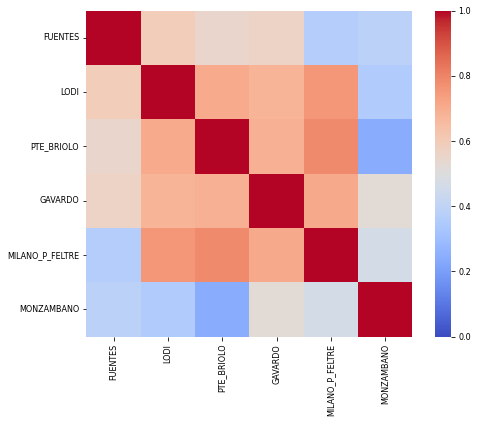

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True, vmin=0, vmax=1)

In [86]:
corr_matrix = timeseriesfinalcondition.corr()
corr_matrix.head(50)

Castenaso  Pracchia  Bomporto  Cremona SIAP  \
Castenaso                  1.000000  0.518284  0.683281      0.195622   
Pracchia                   0.518284  1.000000  0.645406      0.217045   
Bomporto                   0.683281  0.645406  1.000000      0.356259   
Cremona SIAP               0.195622  0.217045  0.356259      1.000000   
Ponte Bacchello            0.622793  0.546971  0.900687      0.400767   
Spessa Po                  0.164618  0.229323  0.300595      0.921154   
Sermide                    0.243242  0.233328  0.367140      0.901886   
Ficarolo                   0.263090  0.247789  0.381487      0.889130   
Pontelagoscuro             0.250552  0.206820  0.361043      0.879559   
Casalecchio canale         0.033390  0.010480  0.057754      0.091193   
Ponte Bacchello            0.622793  0.546971  0.900687      0.400767   
Casalecchio chiusa         0.723380  0.838441  0.814861      0.257005   
Castenaso                  1.000000  0.518284  0.683281      0.195622   
Piacenza                   0.186276  0.225368  0.336592      0.976117   
Borgoforte                 0.240237  0.230192  0.384068      0.939310   
Calcara                    0.841677  0.421852  0.634318      0.157644   
Boretto                    0.236888  0.239640  0.383907      0.965973   
FUENTES                   -0.127708  0.017059 -0.058180      0.387688   
LODI                       0.122120  0.255777  0.249755      0.725661   
PTE_BRIOLO                 0.094461  0.272719  0.239439      0.449000   
GAVARDO                    0.124234  0.304988  0.312131      0.549162   
MILANO_P_FELTRE            0.198510  0.370009  0.351378      0.567525   
MONZAMBANO                 0.121851  0.083882  0.208048      0.386153   
CAMERANA BORMIDA           0.149609  0.229593  0.232761      0.271187   
ISOLA S. ANTONIO PO        0.148519  0.240876  0.292785      0.639213   
MOMBALDONE BORMIDA         0.229011  0.275305  0.315730      0.350906   
MONTECASTELLO TANARO       0.244266  0.314488  0.400010      0.532384   
PALESTRO SESIA             0.079563  0.188409  0.196101      0.407476   
PALLANZA LAGO MAGGIORE     0.123759  0.135241  0.171837      0.617685   
3080                       0.241729  0.153393  0.187628      0.089890   
3110                       0.453321  0.322825  0.387830      0.101208   
3130                       0.288339  0.268777  0.261579      0.093307   
3090                       0.284194  0.237060  0.268020      0.064400   
3150                       0.200534  0.070984  0.124623      0.022955   
3160                       0.308167  0.152627  0.234437      0.062893   
3040                       0.220985  0.142311  0.202724      0.038050   
3060                       0.283309  0.158520  0.209472      0.058163   
3180                       0.227809  0.165630  0.188059      0.051944   
Borgo Valsugana            0.256888  0.338237  0.403815      0.569658   
Cavalese Masi             -0.070029  0.052907  0.064307      0.387945   
Cimego                     0.028762  0.092626  0.106782      0.136493   
Fiera di Primiero         -0.051622  0.156835  0.040584      0.190029   
Grigno Ponte Filippini     0.150278  0.284118  0.337483      0.583791   
Lavis                      0.086154  0.199432  0.210145      0.384967   
Malé                      -0.159673 -0.094153 -0.087498      0.320426   
Marco                     -0.041247  0.063528  0.085068      0.469551   
Mezzolombardo Ponte Rupe   0.029494  0.074945  0.091996      0.393205   
Preore                     0.001221  0.106548  0.087122      0.234774   
Rovereto Ponte Zigherane   0.182106  0.308730  0.384763      0.594570   
S Michele all Adige       -0.153328 -0.058707 -0.041711      0.366001   

                          Ponte Bacchello  Spessa Po   Sermide  Ficarolo  \
Castenaso                        0.622793   0.164618  0.243242  0.263090   
Pracchia                         0.546971   0.229323  0.233328  0.247789   
Bomporto                         0.900687   0.300595  0.367140  0.381487  

<AxesSubplot:>

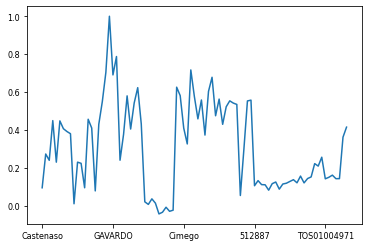

In [87]:
corr_matrix.loc[:, "PTE_BRIOLO"].plot()

<AxesSubplot:>

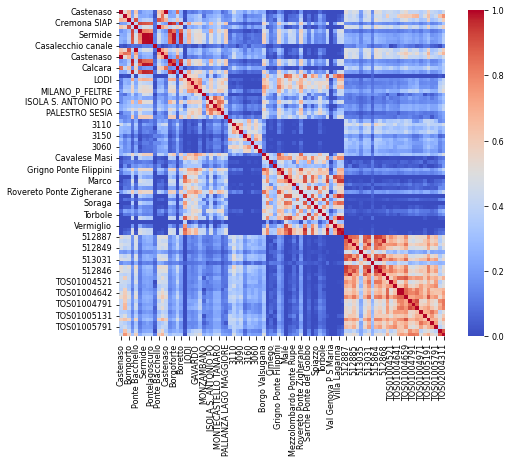

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True, vmin=0, vmax=1)

In [27]:
#network_IT_50 = summarygapsstations[summarygapsstations.PercentageGaps < 50.0]
#network_IT_50.to_excel(r'GIS\Catchments\Italy\network_IT_50.xlsx') 

In [42]:
timeseriesfinalcondition.loc[:, "513035"].corr(timeseriesfinalcondition.loc[:, "513039"])

0.6242408739346221